In [40]:
import numpy as np
import pandas as pd
import h5py
import glob
import matplotlib.pyplot as plt

## Exploracion de los datos

In [ ]:
# Esto lo hago porque estoy trabajando en un servidor remoto (MV -> vscode)
import os
os.chdir("/home/2025/AST0421-1/mvalderrav/exp4/")
os.getcwd()


'/home/2025/AST0421-1/mvalderrav/exp4'

In [5]:
f = h5py.File("Data_Exp4/jellyfish.hdf5", "r")



In [8]:
print(list(f["Group"]["GroupFirstSub"]))



[np.int32(0)]


In [9]:
masses = f["Subhalo"]["SubhaloMassType"][:]
print(masses.shape)


(63864, 6)


In [72]:
f = h5py.File("Data_Exp4/stellar_sizes_099.hdf5", "r")



## Parte 1 Exploracion

In [19]:
## Ya que no podemos clonar el repositorio, debemos hacer todo por nuestra cuenta, que sera mejor para aprender... (supongo)

files = sorted(glob.glob("Data_Exp4/fof_subhalo_tab_099.*.hdf5"))
print(len(files))


680


In [ ]:

# 1. Localizar archivos del snapshot 099


subhalo_files = sorted(glob.glob("Data_Exp4/fof_subhalo_tab_099.*.hdf5"))

print(f"Encontrados {len(subhalo_files)} archivos del snapshot 099\n")


# 2. Leer SOLO SUBHALOS que serán los que ocuparemos tanto para el primer avance como para los
# modelos finales.


all_subhalo = {}
first = True

for file in subhalo_files:
    
    with h5py.File(file, "r") as f:
        
        sub = f["Subhalo"]   # solo esto nos interesa
        
        # primera pasada: inicializamos listas
        if first:
            for key in sub.keys():
                all_subhalo[key] = []
        
        # agregamos los datos de este archivo
        for key in sub.keys():
            all_subhalo[key].append(sub[key][:])
    
    first = False


# 3. Concatenar todos los campos

for key in all_subhalo:
    all_subhalo[key] = np.concatenate(all_subhalo[key], axis=0)

print("\nVariables del Subhalo cargadas:")
print(list(all_subhalo.keys()))
print(f"\nTotal de subhalos: {len(all_subhalo['SubhaloMass'])}")


# 4. Guardar archivo maestro

output = "TNG099_subhalos_full.npz"
np.savez(output, **all_subhalo)

print("\n Archivo guardado como:", output)
# Cargarlo depsues con: data = np.load("TNG099_subhalos_full.npz")


Encontrados 680 archivos del snapshot 099


Variables del Subhalo cargadas:
['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalF

In [4]:

jpath = "Data_Exp4/jellyfish.hdf5"
f = h5py.File(jpath, "r")
contador= 0
for i in f["Branches_Inspected"]:
    contador += len(i)

print(contador)

print(f["Snapshot_099"]["SubhaloIDs"])

print(f["Branches_JellyfishFlag"])

contador = 0 
# SIEMPRE EL PRIMER ELEMENTO CORRESPONDE AL SNAPSHOT 99

for i in f["Branches_JellyfishFlag"]:
    if i[0] == 1:
        contador += 1

subfinid_ids = [lista[0] for lista in f["Branches_SubfindID"]]
jf_flag  = [lista[0] for lista in f["Branches_JellyfishFlag"]]


# Ahora queremos encontrar los indices que corresponden a los jellyfish verdaderos.

Id_jellyfish = []

for i in range(len(jf_flag)):
    if jf_flag[i] == 1:
        #print(f"SubfindID: {subfinid_ids[i]} es un jellyfish")
        Id_jellyfish.append(subfinid_ids[i])


print(len(Id_jellyfish))

502300
<HDF5 dataset "SubhaloIDs": shape (1417,), type "<i8">
<HDF5 dataset "Branches_JellyfishFlag": shape (5023, 100), type "|i1">
118


In [15]:
import numpy as np

# ===========================================================
# 1. Cargar tu catálogo de Subhalos (El archivo grande)
# ===========================================================
path_sub = "TNG099_subhalos_full.npz"
print(f"Cargando subhalos desde: {path_sub} ...")

# Cargamos el archivo .npz y lo convertimos a diccionario editable
sub_data = np.load(path_sub, allow_pickle=True)
subhalos = {key: sub_data[key] for key in sub_data.files}

# Obtenemos el número total de galaxias (N) para saber el tamaño del array
N = len(subhalos["SubhaloMass"])
print(f"Total de subhalos en el sistema: {N}")


# ===========================================================
# 2. Integrar tu lista 'Id_jellyfish' (Vectorización)
# ===========================================================
print(f"Procesando tu lista de {len(Id_jellyfish)} medusas...")

# Convertimos tu lista a un array de Numpy para velocidad
ids_para_marcar = np.array(Id_jellyfish, dtype=int)

# Paso A: Crear el array de ceros (Nadie es Jellyfish por defecto)
jelly_flag = np.zeros(N, dtype=int)

valid_ids = ids_para_marcar[ids_para_marcar < N]

if len(valid_ids) < len(ids_para_marcar):
    print(f" Advertencia: Se ignoraron {len(ids_para_marcar) - len(valid_ids)} IDs porque son mayores que el N del catálogo.")

# Ponemos un 1 en todas las posiciones indicadas por la lista
jelly_flag[valid_ids] = 1

# Verificación
print(f"¡Listo! Se han marcado {np.sum(jelly_flag)} galaxias en la nueva columna.")


# ===========================================================
# 3. Guardar el catálogo final
# ===========================================================
output_name = "TNG099_subhalos_with_jellyfish.npz"

# Agregamos la nueva columna al diccionario manteniendo todo lo demás igual
subhalos["JellyfishFlag"] = jelly_flag

print(f"Guardando archivo final en: {output_name} ...")
np.savez(output_name, **subhalos)

print("\n Catálogo final listo y guardado.")

Cargando subhalos desde: TNG099_subhalos_full.npz ...
Total de subhalos en el sistema: 5688113
Procesando tu lista de 118 medusas...
¡Listo! Se han marcado 118 galaxias en la nueva columna.
Guardando archivo final en: TNG099_subhalos_with_jellyfish.npz ...

✅ Catálogo final listo y guardado.


In [104]:
data = np.load("TNG099_subhalos_with_jellyfish.npz")
jf = data["JellyfishFlag"]

print("Total Jellyfish:", np.sum(jf == 1))
print("Total inspeccionadas:", np.sum(~np.isnan(jf)))


Total Jellyfish: 118
Total inspeccionadas: 5688113


In [10]:
data = np.load("TNG099_subhalos_with_jellyfish.npz")
pos = data["SubhaloPos"]        # (N,3)
sfr = data["SubhaloSFR"]        # (N,)
jf  = data["JellyfishFlag"]     # (N,)


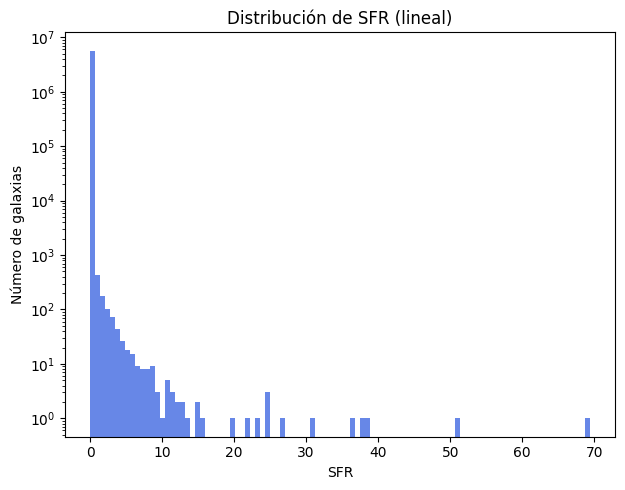

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
import numpy as np

data = np.load("TNG099_subhalos_with_jellyfish.npz")
sfr = data["SubhaloSFR"]

# Evitar problemas con log(0)
sfr_safe = np.clip(sfr, 1e-10, None)
log_sfr = np.log10(sfr_safe)

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.hist(sfr, bins=100, color='royalblue', alpha=0.8)
plt.xlabel("SFR")
plt.ylabel("Número de galaxias")
plt.title("Distribución de SFR (lineal)")
plt.yscale("log")  

plt.tight_layout()
plt.show()


print


=== Procesando key: 'SubhaloBHMass'  (N=5688113) ===


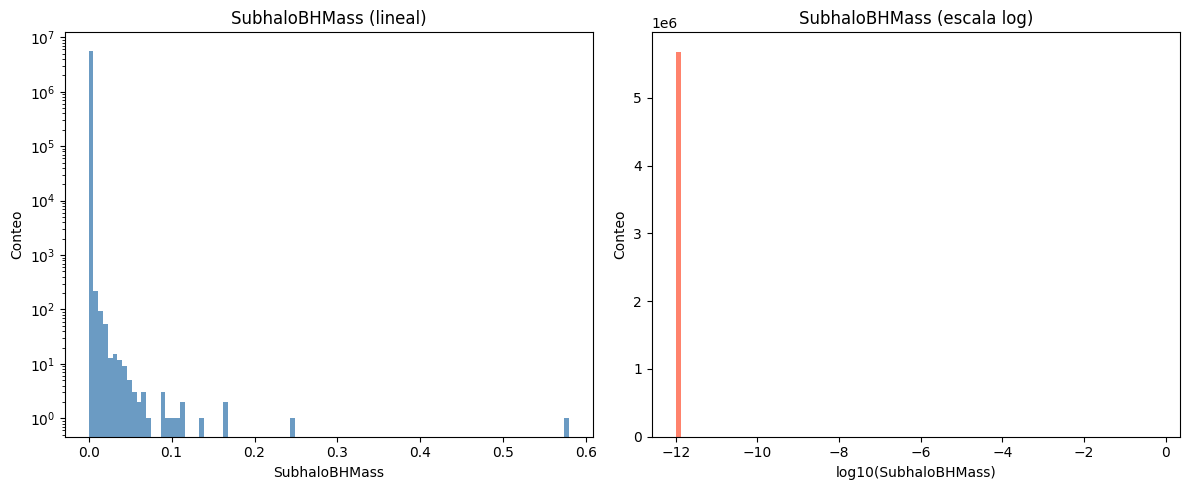


=== Procesando key: 'SubhaloBHMdot'  (N=5688113) ===


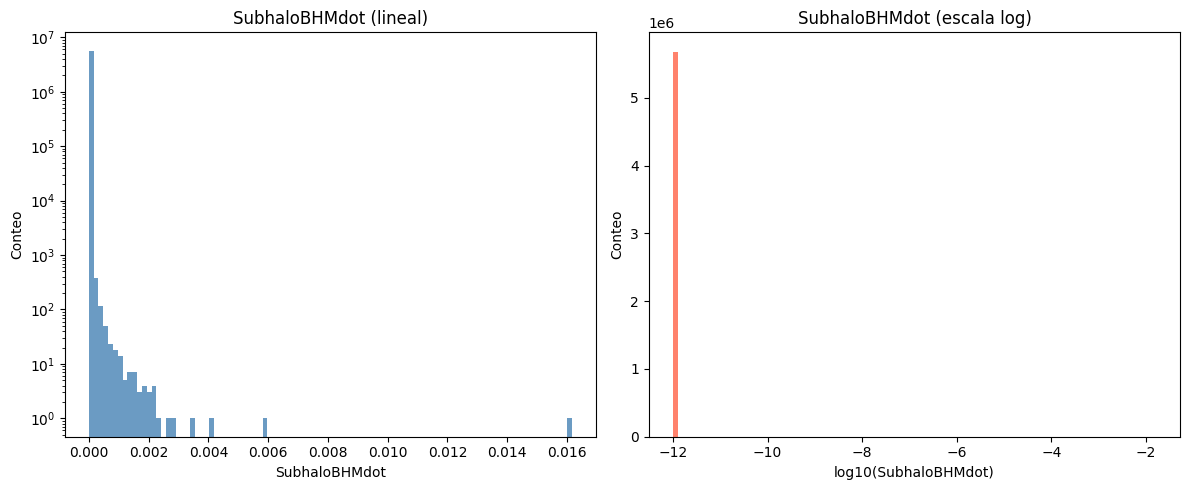


=== Procesando key: 'SubhaloBfldDisk'  (N=5688113) ===


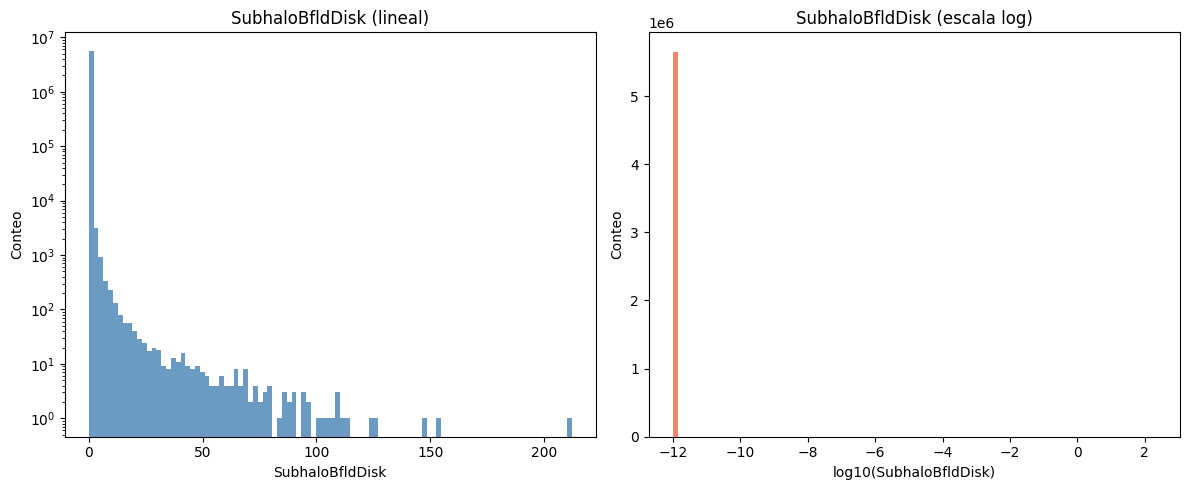


=== Procesando key: 'SubhaloBfldHalo'  (N=5688113) ===


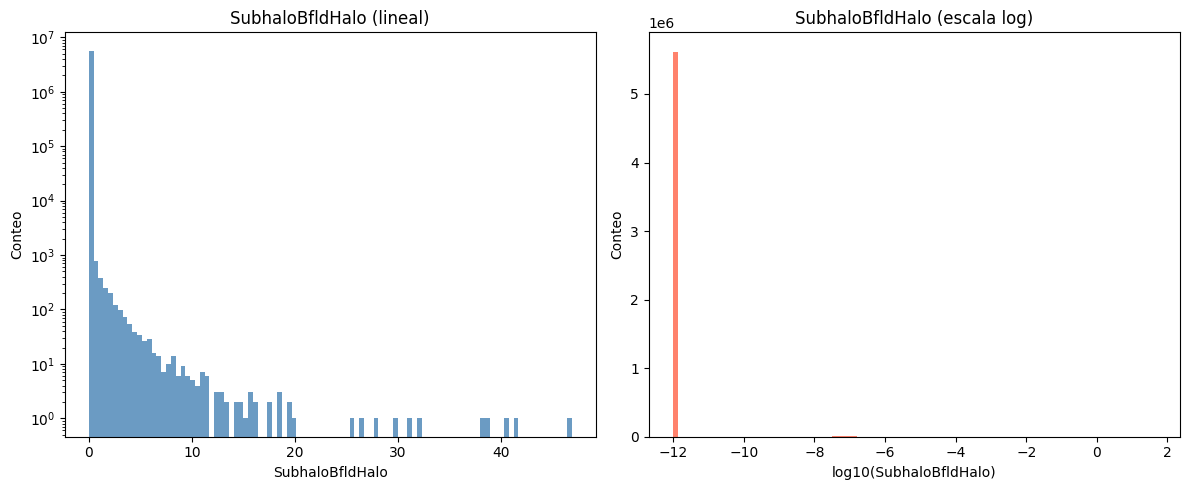


=== Procesando key: 'SubhaloFlag'  (N=5688113) ===
⚠️  Key 'SubhaloFlag' no es numérica. Tipo=bool. Saltando.

=== Procesando key: 'SubhaloGasMetallicity'  (N=5688113) ===


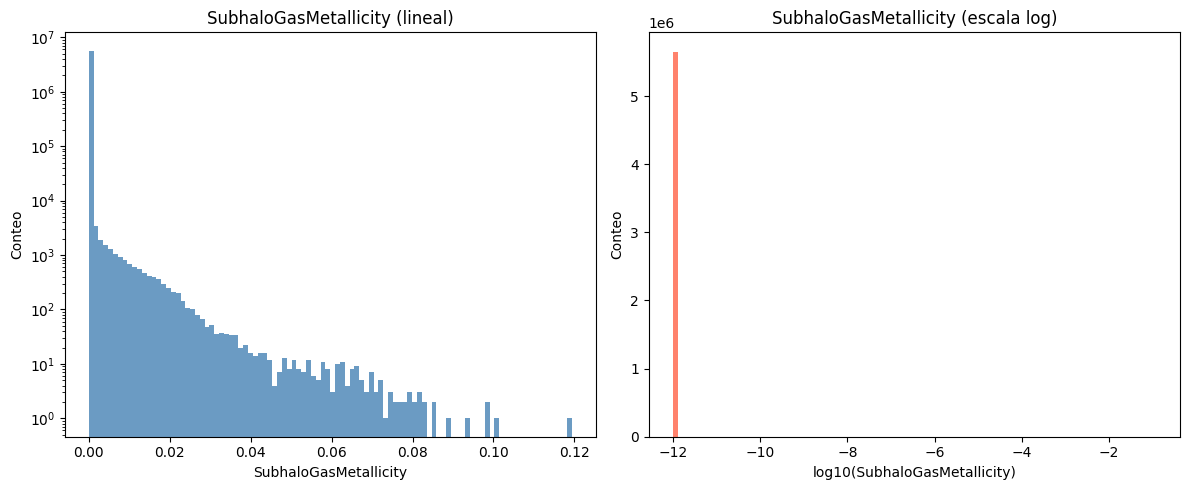


=== Procesando key: 'SubhaloGasMetallicityHalfRad'  (N=5688113) ===


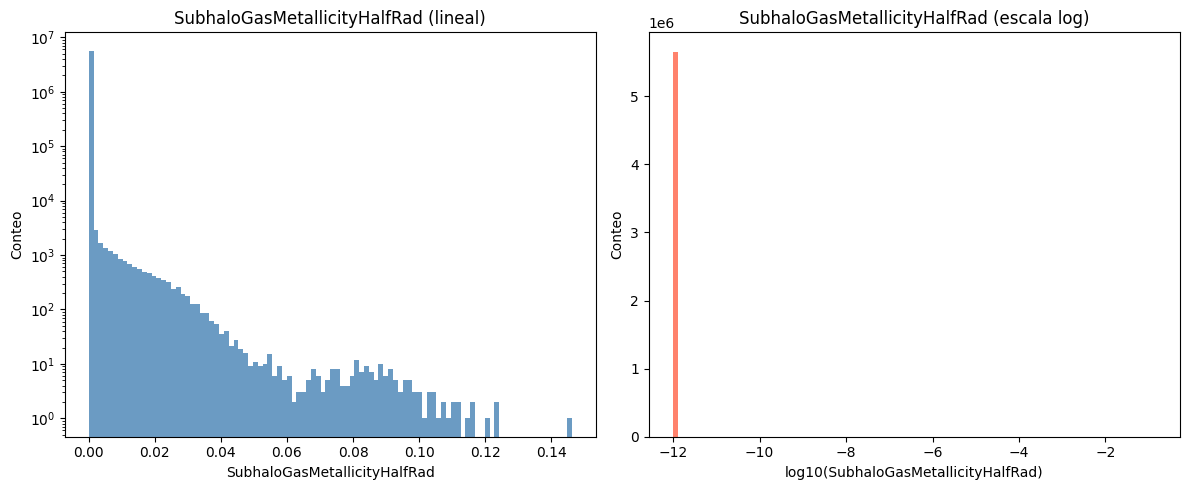


=== Procesando key: 'SubhaloGasMetallicityMaxRad'  (N=5688113) ===


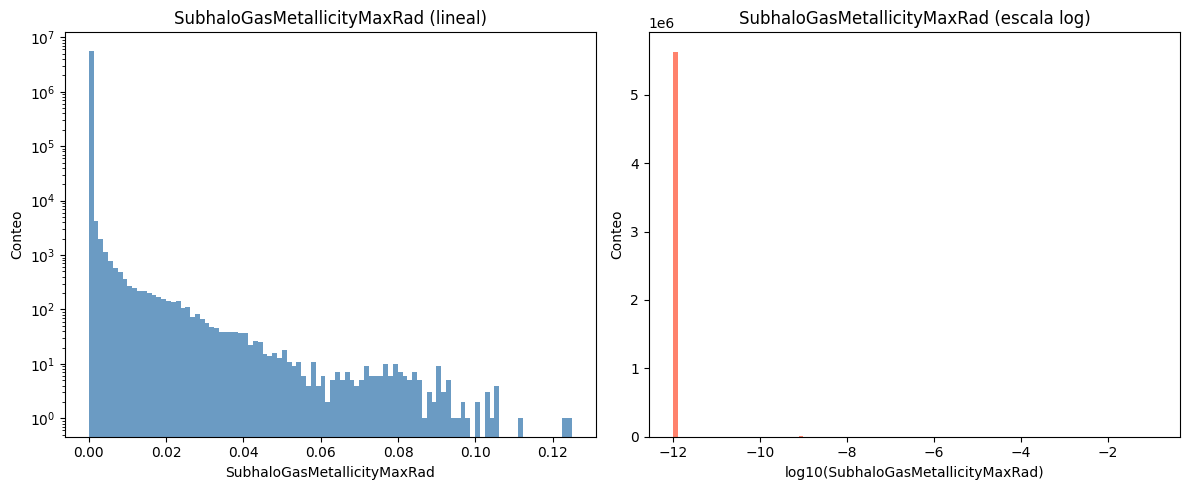


=== Procesando key: 'SubhaloGasMetallicitySfr'  (N=5688113) ===


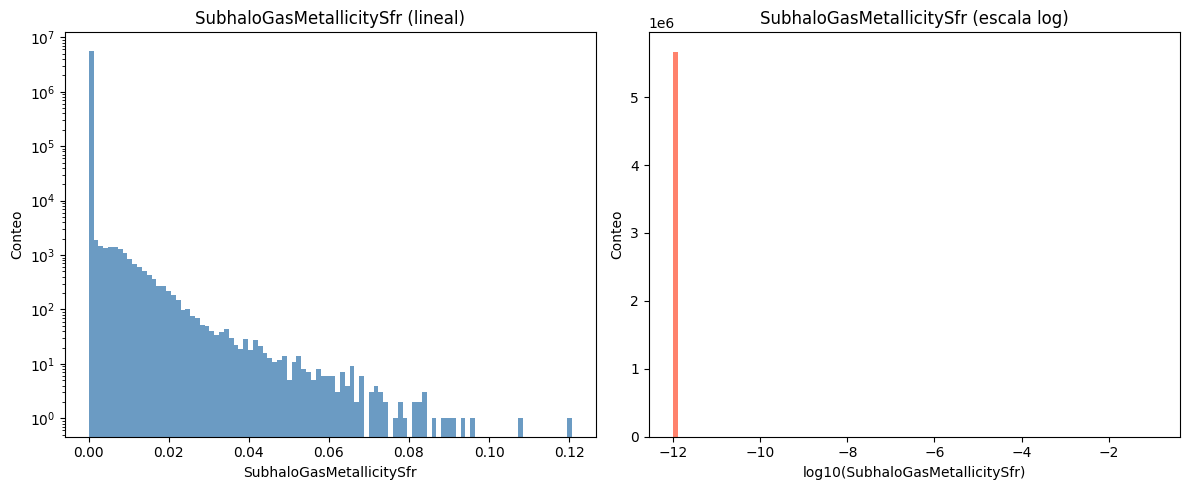


=== Procesando key: 'SubhaloGasMetallicitySfrWeighted'  (N=5688113) ===


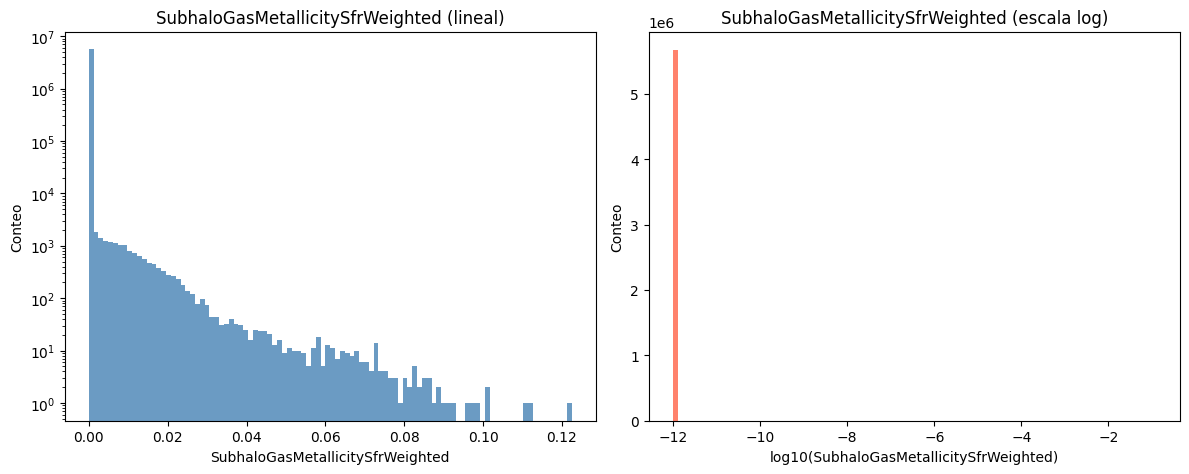


=== Procesando key: 'SubhaloGrNr'  (N=5688113) ===


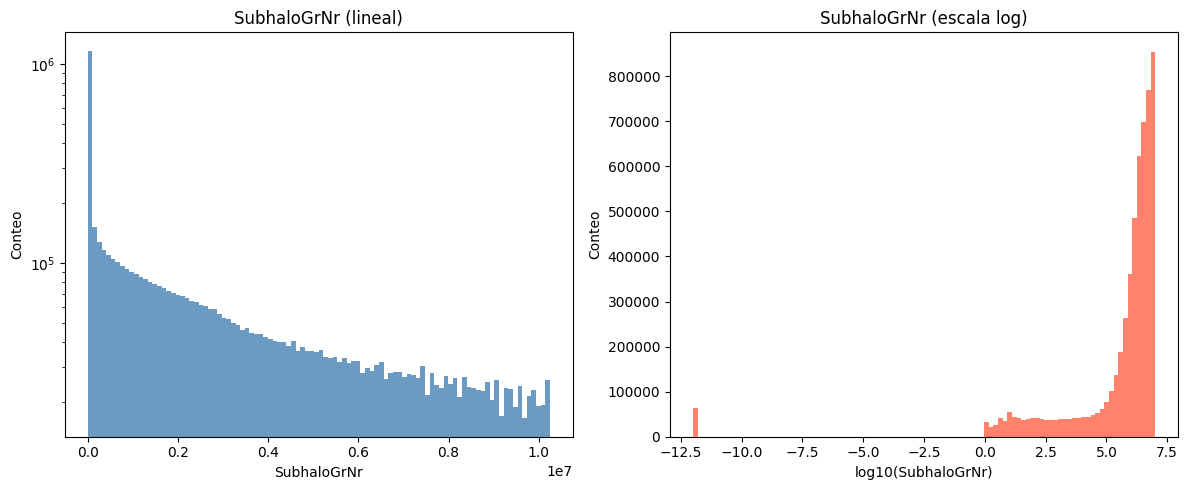


=== Procesando key: 'SubhaloHalfmassRad'  (N=5688113) ===


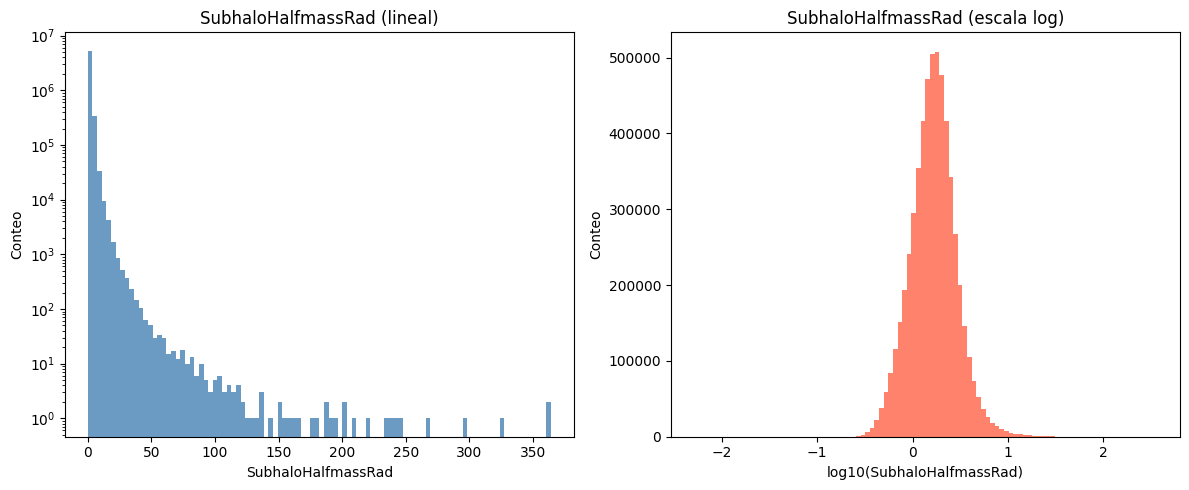


=== Procesando key: 'SubhaloIDMostbound'  (N=5688113) ===


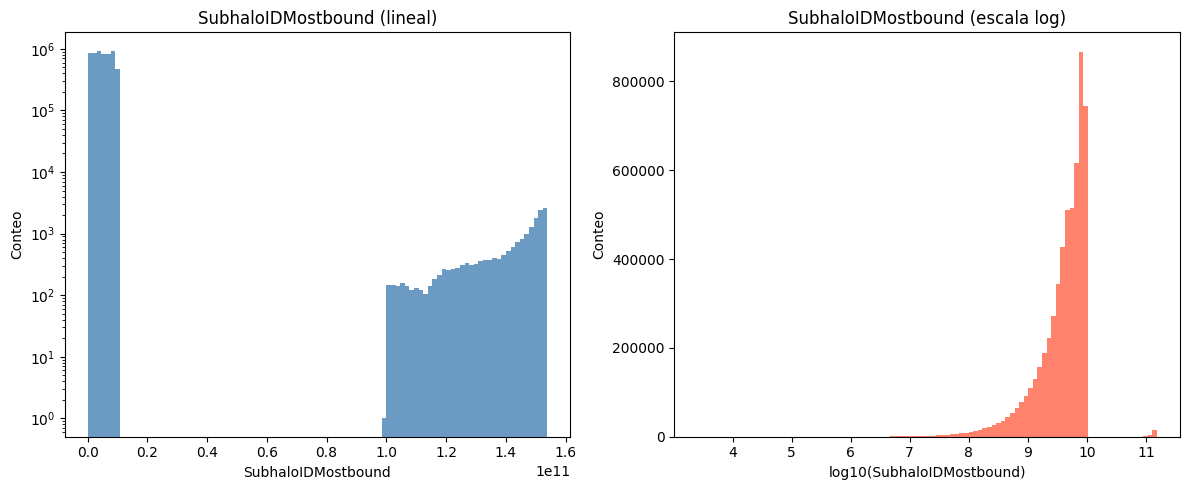


=== Procesando key: 'SubhaloLen'  (N=5688113) ===


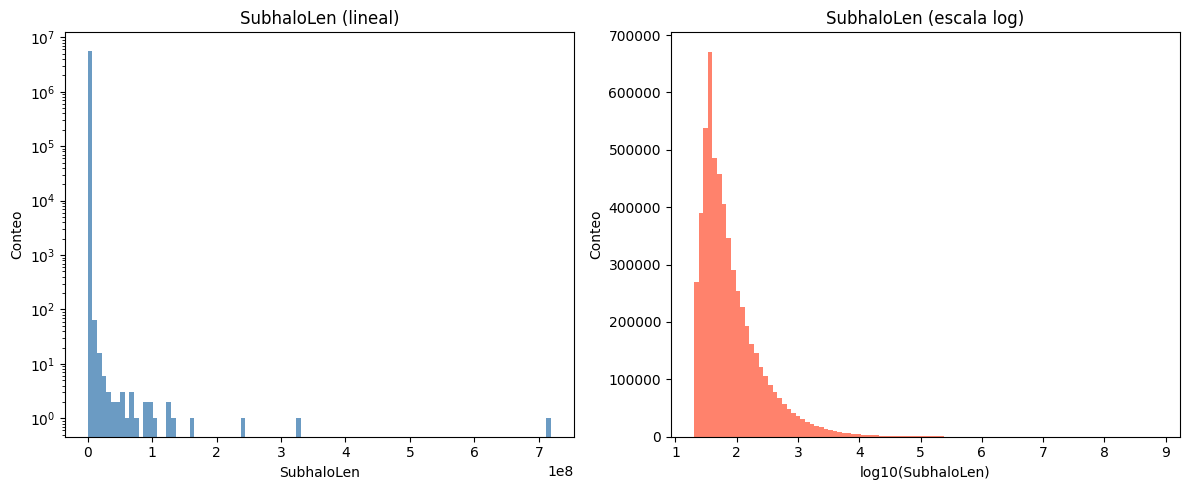


=== Procesando key: 'SubhaloMass'  (N=5688113) ===


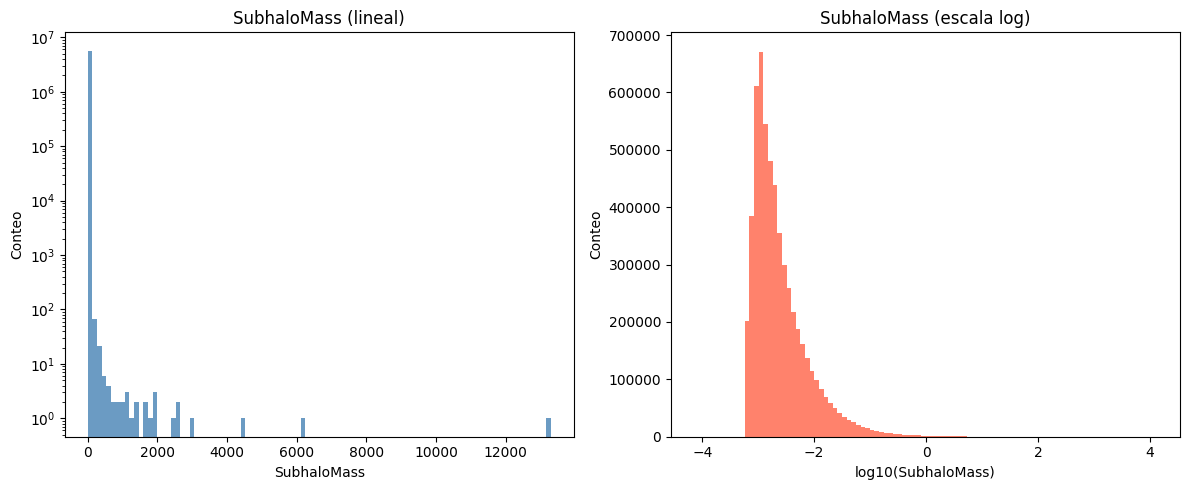


=== Procesando key: 'SubhaloMassInHalfRad'  (N=5688113) ===


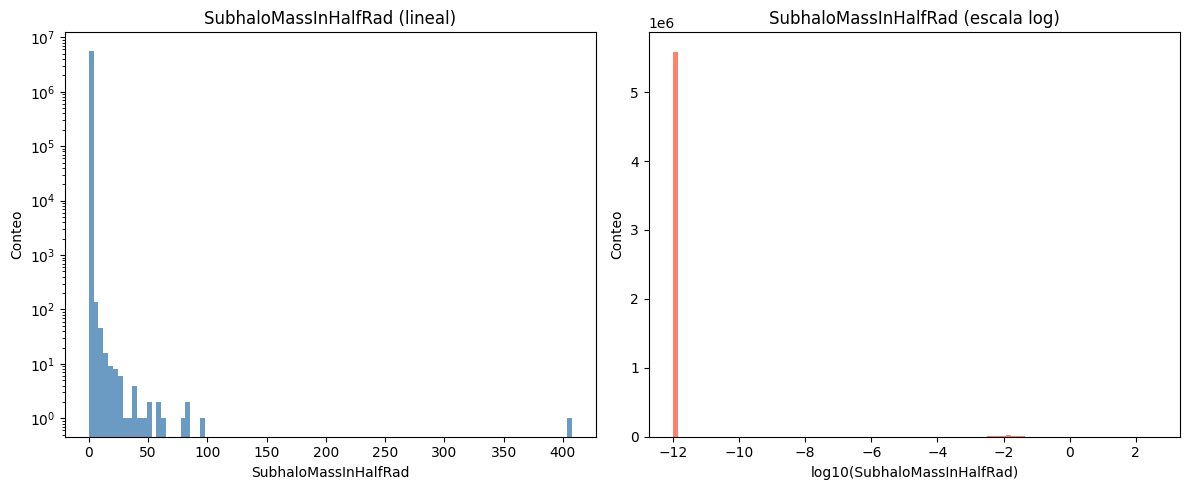


=== Procesando key: 'SubhaloMassInMaxRad'  (N=5688113) ===


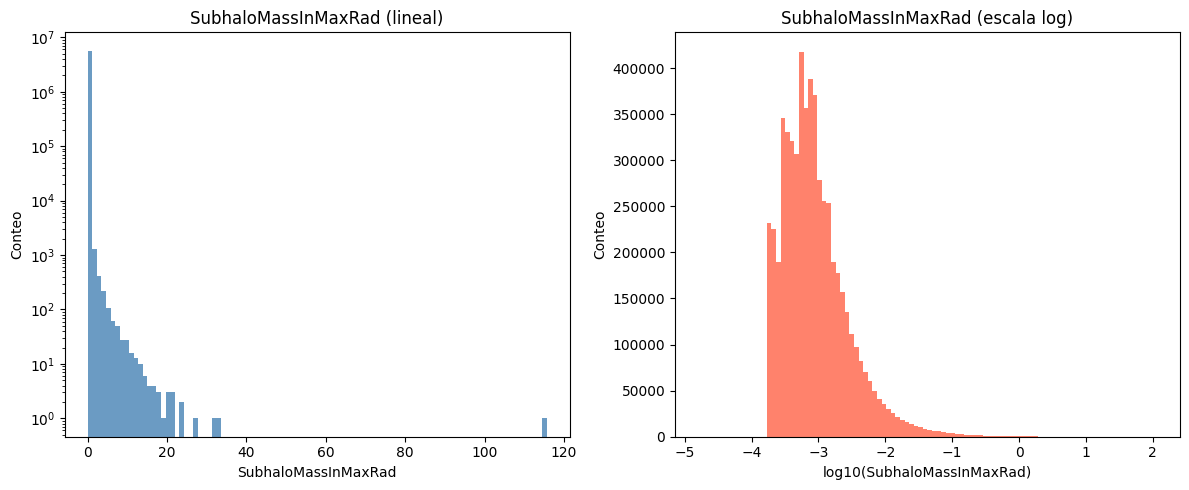


=== Procesando key: 'SubhaloMassInRad'  (N=5688113) ===


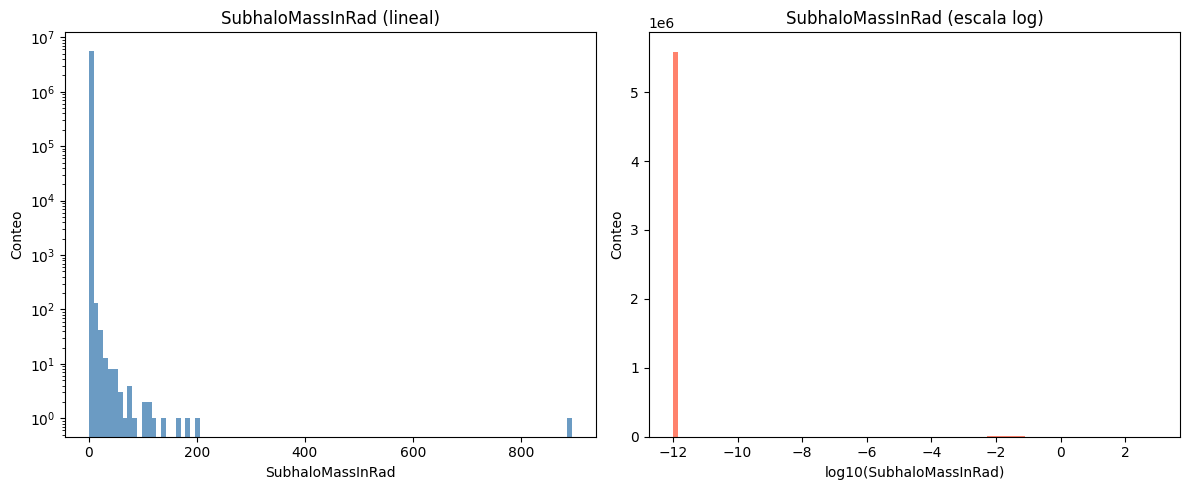


=== Procesando key: 'SubhaloParent'  (N=5688113) ===


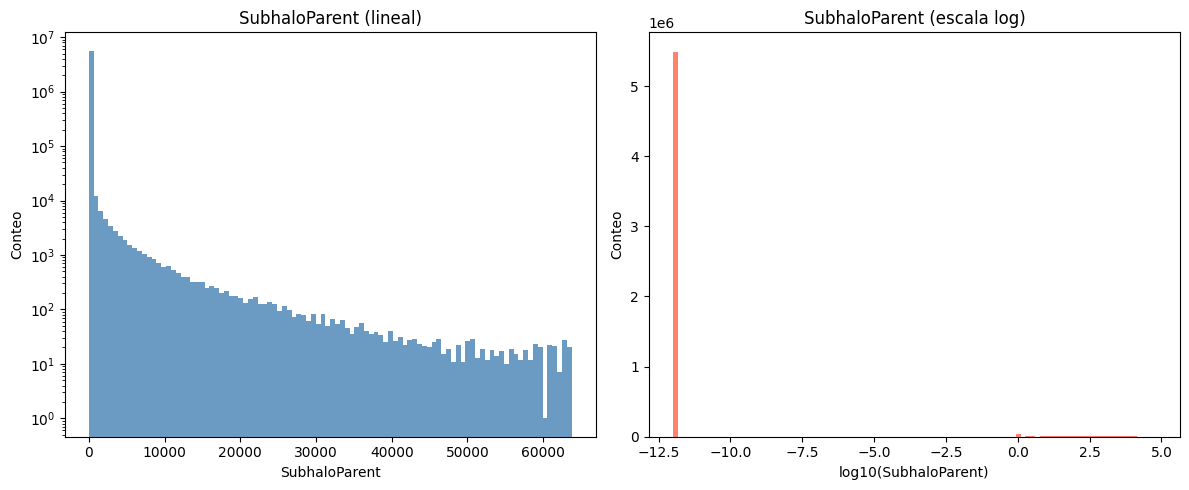


=== Procesando key: 'SubhaloSFR'  (N=5688113) ===


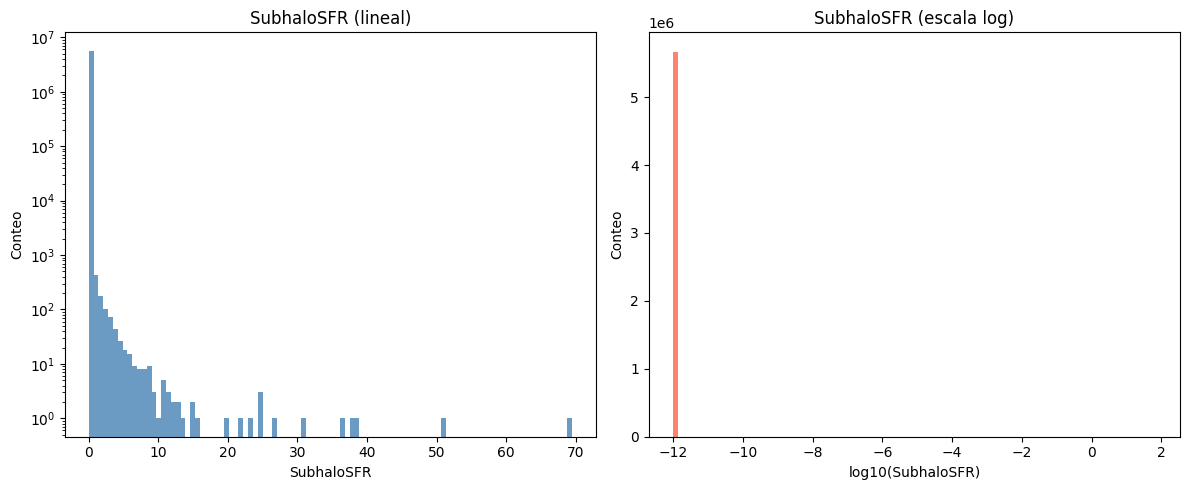


=== Procesando key: 'SubhaloSFRinHalfRad'  (N=5688113) ===


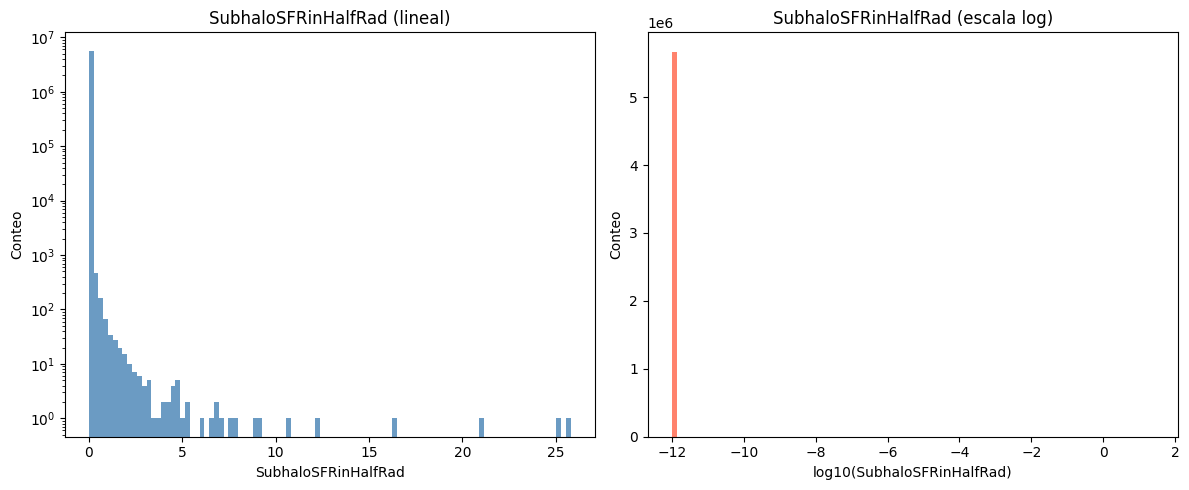


=== Procesando key: 'SubhaloSFRinMaxRad'  (N=5688113) ===


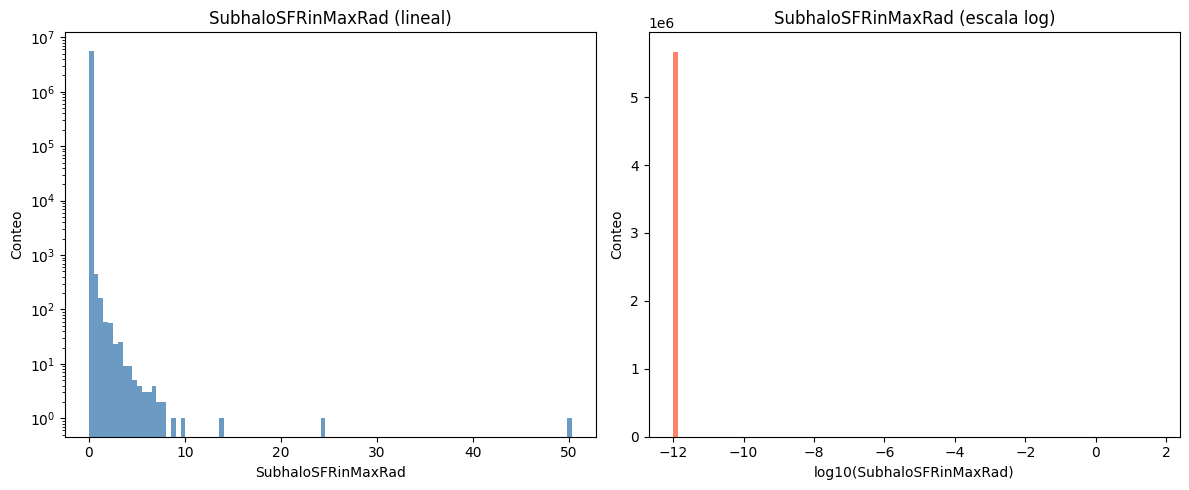


=== Procesando key: 'SubhaloSFRinRad'  (N=5688113) ===


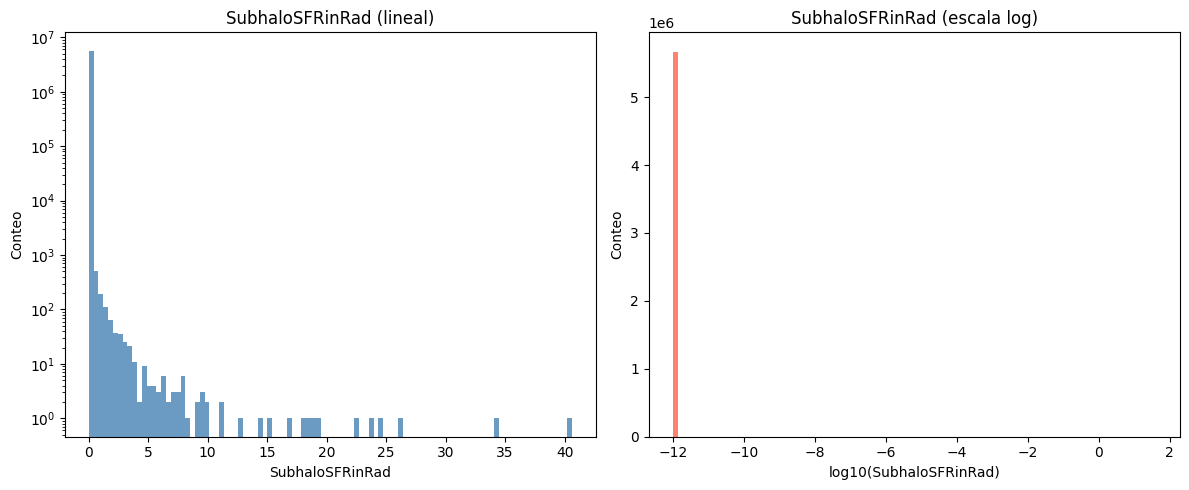


=== Procesando key: 'SubhaloStarMetallicity'  (N=5688113) ===


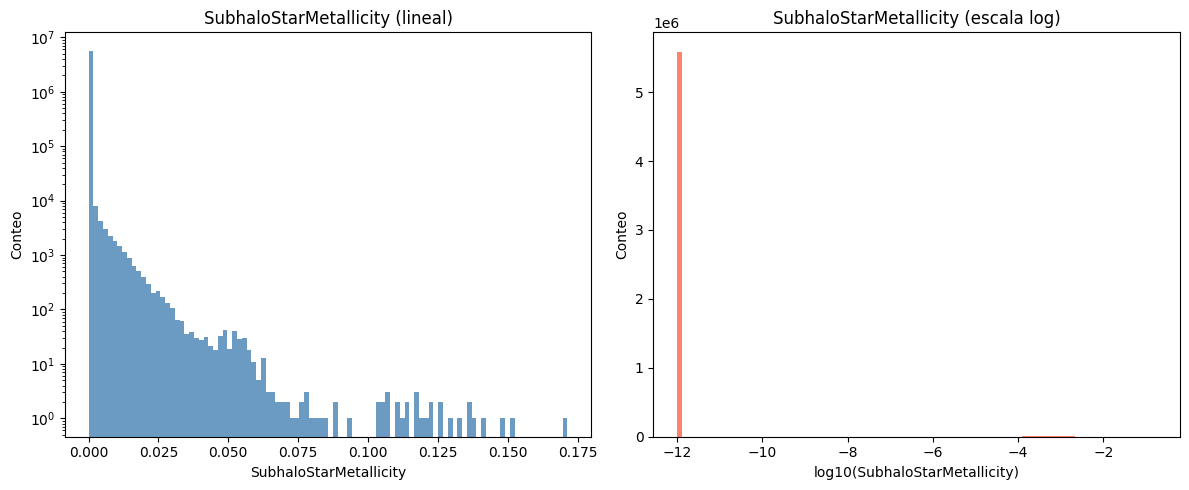


=== Procesando key: 'SubhaloStarMetallicityHalfRad'  (N=5688113) ===


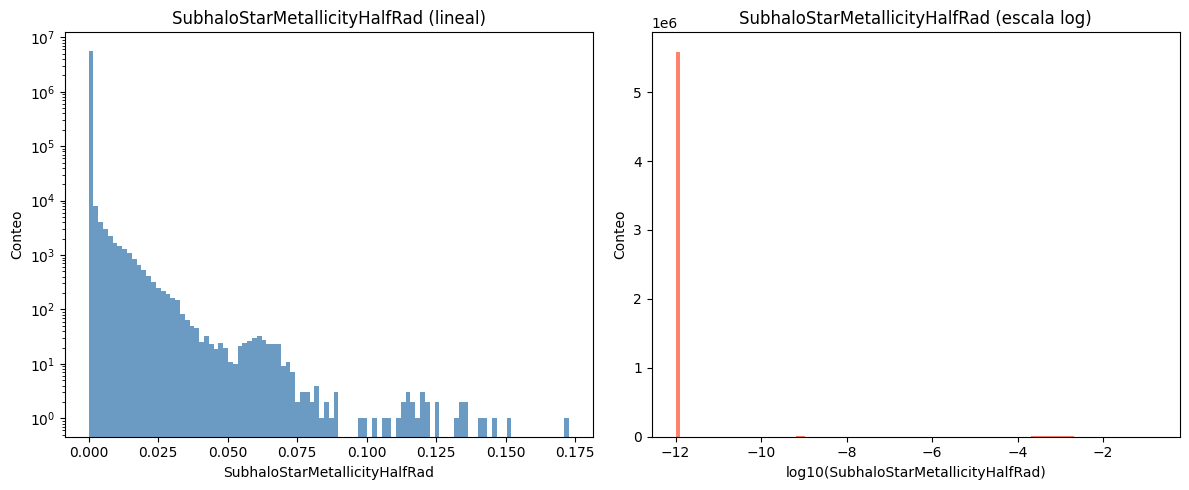


=== Procesando key: 'SubhaloStarMetallicityMaxRad'  (N=5688113) ===


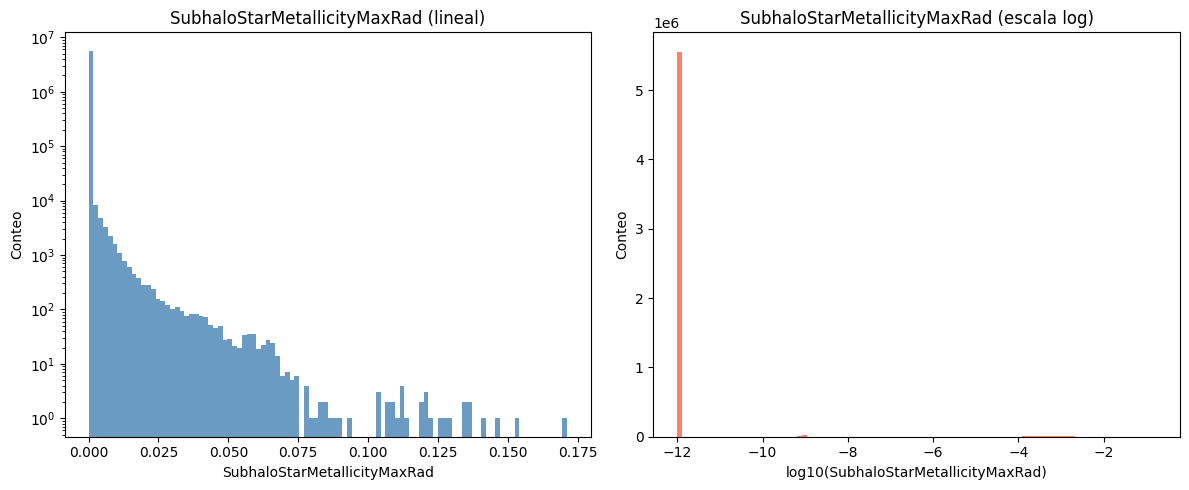


=== Procesando key: 'SubhaloStellarPhotometricsMassInRad'  (N=5688113) ===


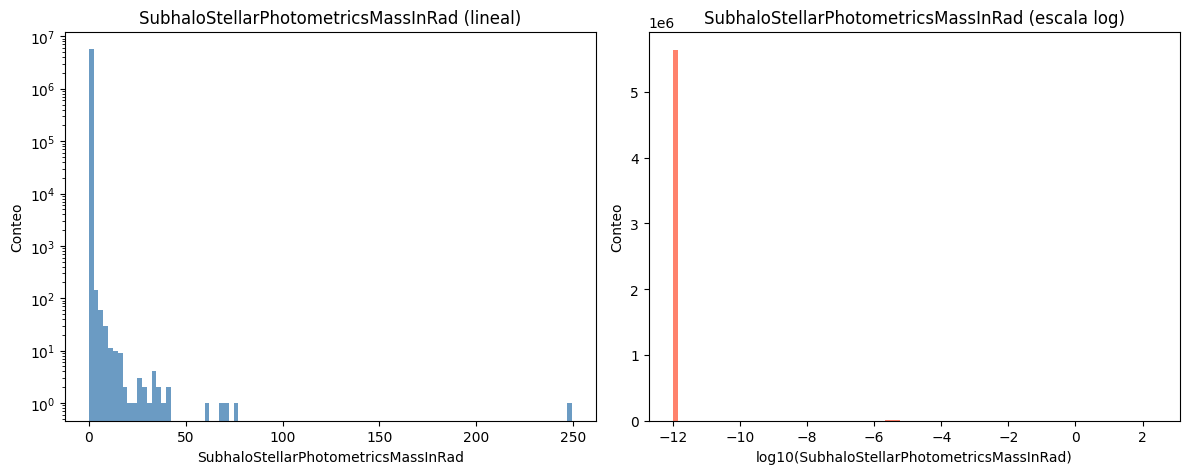


=== Procesando key: 'SubhaloStellarPhotometricsRad'  (N=5688113) ===


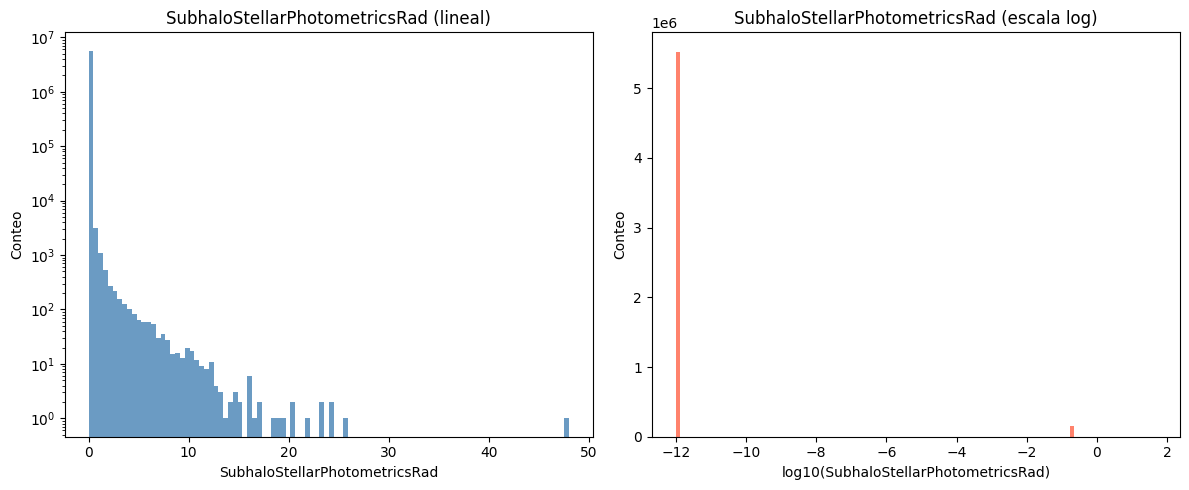


=== Procesando key: 'SubhaloVelDisp'  (N=5688113) ===


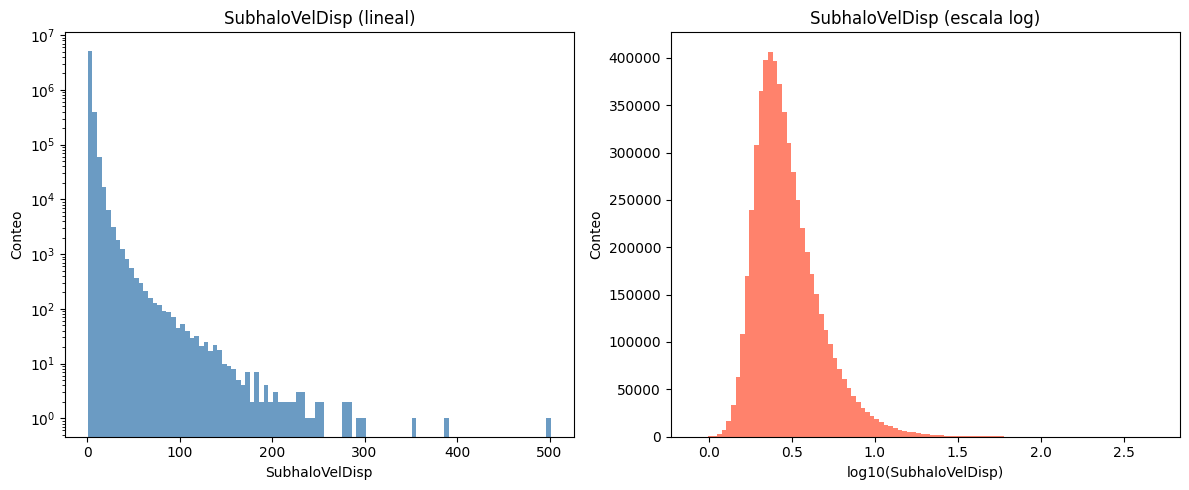


=== Procesando key: 'SubhaloVmax'  (N=5688113) ===


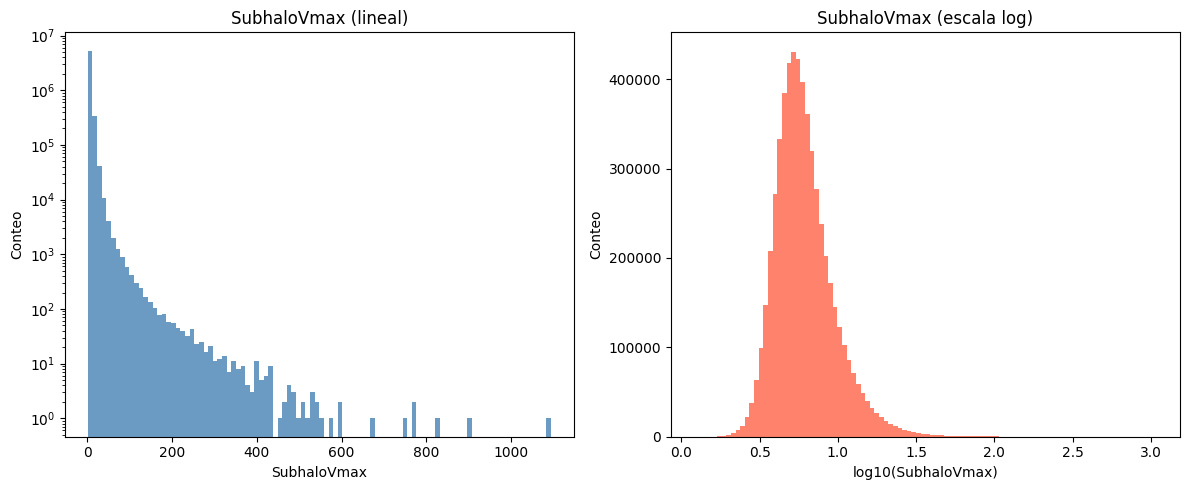


=== Procesando key: 'SubhaloVmaxRad'  (N=5688113) ===


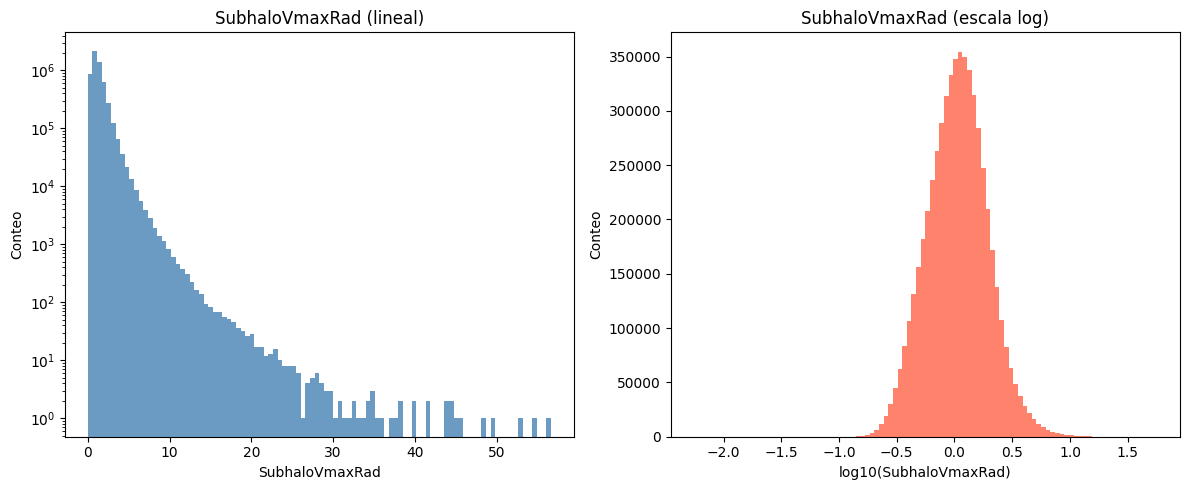


=== Procesando key: 'SubhaloWindMass'  (N=5688113) ===


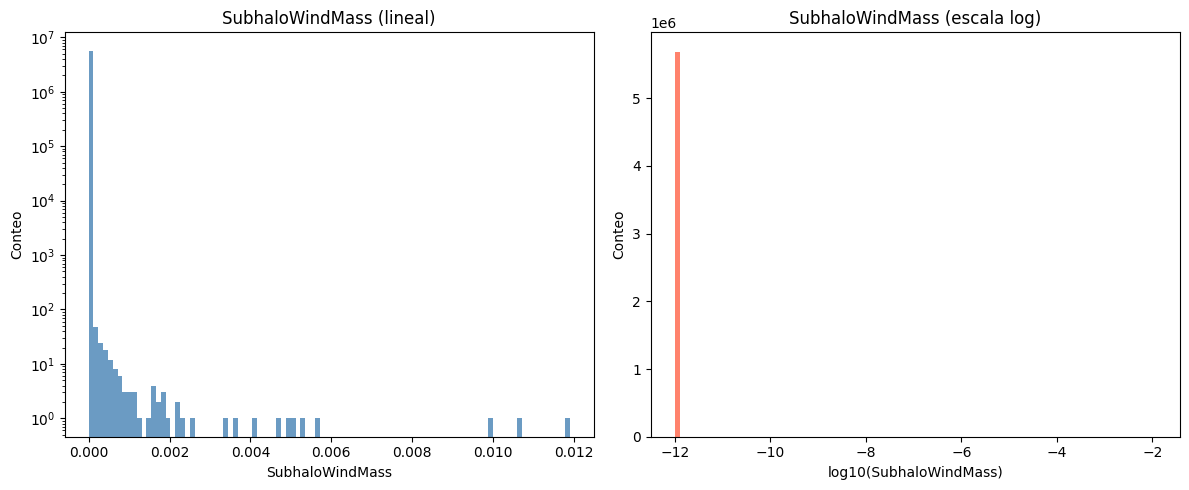


=== Procesando key: 'JellyfishFlag'  (N=5688113) ===


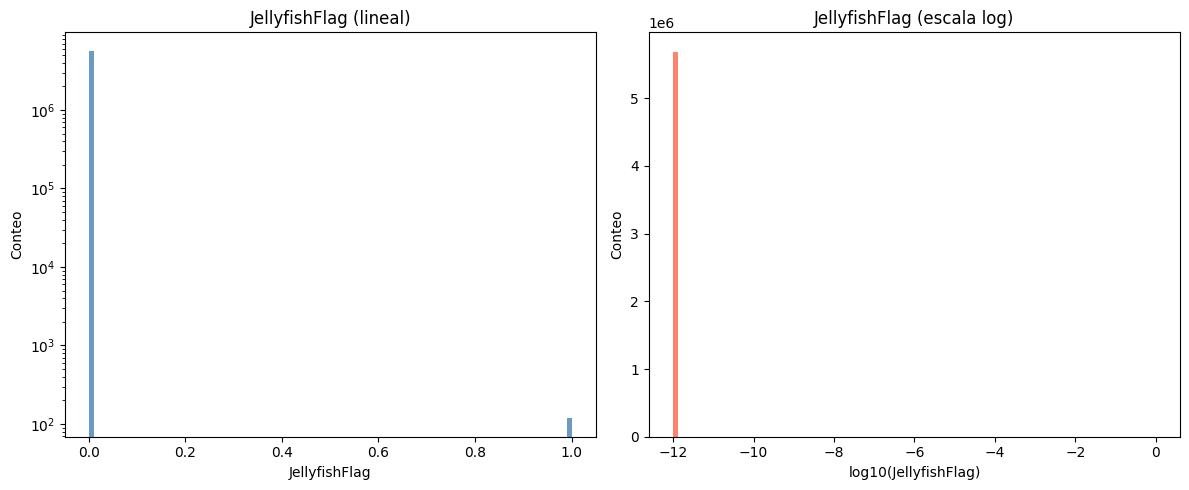

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms_1d(npz_data, bins=100):
    """
    Genera histogramas para todas las keys 1D (shape = (N,))
    Si encuentra arrays booleanos o no numéricos, los convierte a enteros
    o los ignora según corresponda.
    """
    for key in npz_data.files:
        arr = npz_data[key]

        # Solo (N,)
        if arr.ndim != 1:
            continue

        print(f"\n=== Procesando key: '{key}'  (N={arr.shape[0]}) ===")

        # Verificar si es numérico
        if not np.issubdtype(arr.dtype, np.number):
            print(f"  Key '{key}' no es numérica. Tipo={arr.dtype}. Saltando.")
            continue

        # Convertir booleanos a enteros
        if arr.dtype == bool:
            print(f"  Key '{key}' es booleana -> convirtiendo a 0/1")
            arr = arr.astype(int)

        # Evitar log(0)
        safe = np.clip(arr.astype(float), 1e-12, None)
        log_safe = np.log10(safe)

        # ------------------------------------------------------
        # Graficar
        # ------------------------------------------------------
        plt.figure(figsize=(12,5))

        # Histograma lineal
        plt.subplot(1,2,1)
        plt.hist(arr, bins=bins, color="steelblue", alpha=0.8)
        plt.xlabel(key)
        plt.ylabel("Conteo")
        plt.title(f"{key} (lineal)")
        plt.yscale("log")

        # Histograma log10
        plt.subplot(1,2,2)
        plt.hist(log_safe, bins=bins, color="tomato", alpha=0.8)
        plt.xlabel(f"log10({key})")
        plt.ylabel("Conteo")
        plt.title(f"{key} (escala log)")
  

        plt.tight_layout()
        plt.show()


data = np.load("TNG099_subhalos_with_jellyfish.npz")
plot_histograms_1d(data)


## Ahora tenemos todos los datos y tambien su clasifcacion de jellyfish. 

Una vez que ya tenemos esto eso posible trabajar con todos los datos disponibles.

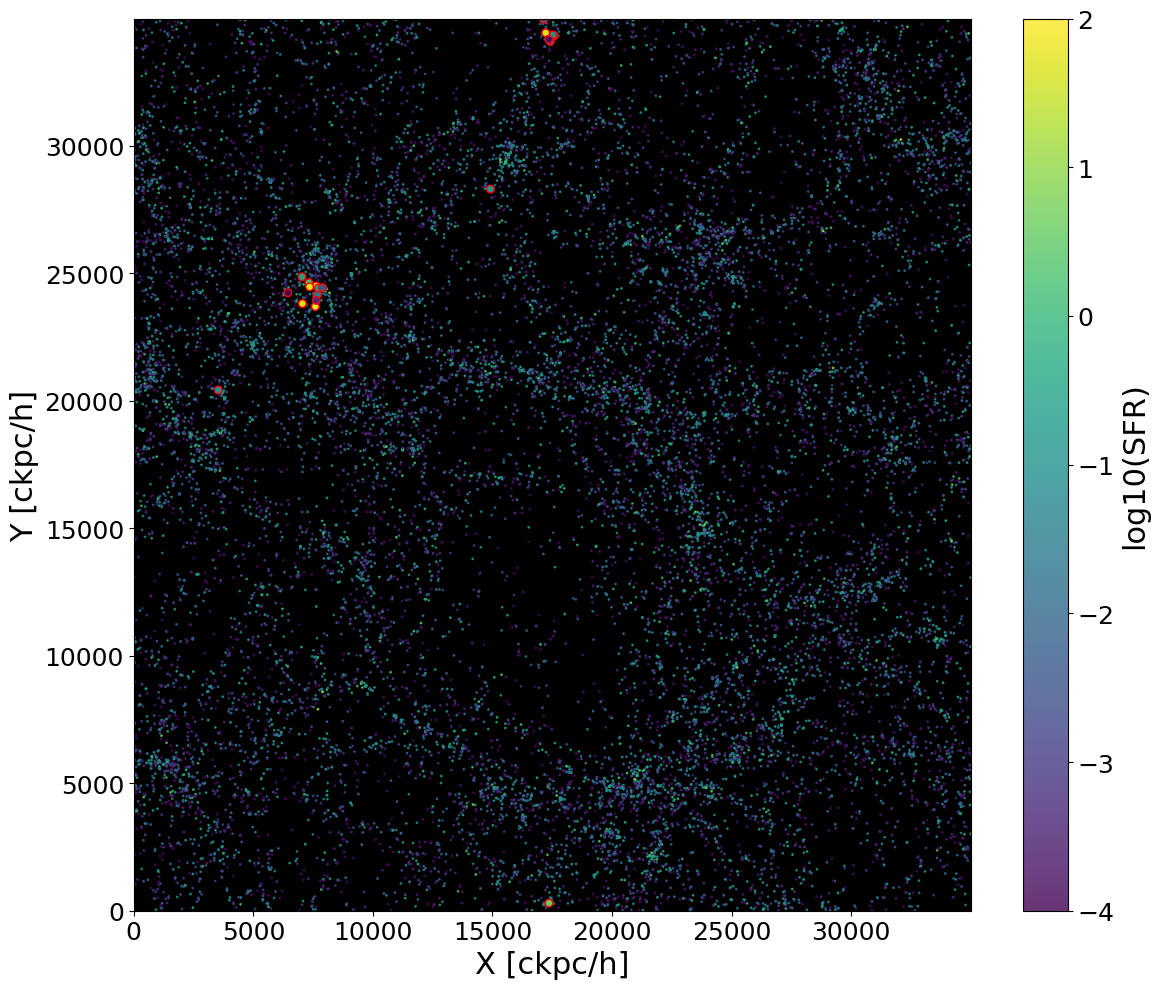

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Datos
# -----------------------------------------------------
data = np.load("TNG099_subhalos_with_jellyfish.npz")

pos = data["SubhaloPos"]
sfr = data["SubhaloSFR"]
jf  = data["JellyfishFlag"]

x = pos[:,0]
y = pos[:,1]

# -----------------------------------------------------
# Máscaras
# -----------------------------------------------------
mask_sfr0 = (sfr == 0)
mask_sfr_pos = (sfr > 0) 

# log10(SFR) con protección
sfr_plot = np.log10(sfr[mask_sfr_pos] + 1e-4)

# Jellyfish solo para SFR>0
is_jf_pos = (jf[mask_sfr_pos] == 1)

# -----------------------------------------------------
# Plot
# -----------------------------------------------------
plt.figure(figsize=(12,10))

# 1) Galaxias con SFR = 0 en negro
plt.scatter(
    x[mask_sfr0], y[mask_sfr0],
    color="black",
    s=2,
    alpha=0.7,
    label="SFR = 0"
)

# 2) Galaxias con SFR > 0 usando colormap
sc = plt.scatter(
    x[mask_sfr_pos], y[mask_sfr_pos],
    c=sfr_plot,
    cmap="viridis",
    s=1,
    alpha=0.8,
    vmin=-4, vmax=2,  # ajusta según el rango real de SFR
)


# 3) Jellyfish con borde rojo (solo SFR>0)
plt.scatter(
    x[mask_sfr_pos][is_jf_pos],
    y[mask_sfr_pos][is_jf_pos],
    c=sfr_plot[is_jf_pos],
    cmap="viridis",
    s=30,
    edgecolors="red",
    linewidths=1,
    label="Jellyfish"
)

# -----------------------------------------------------
# Ajustes finales
# -----------------------------------------------------
plt.xlabel("X [ckpc/h]", fontsize = 22)
plt.ylabel("Y [ckpc/h]", fontsize = 22)

cbar = plt.colorbar(sc)
cbar.set_label("log10(SFR)", fontsize = 22)
cbar.ax.tick_params(labelsize=18)   # ← aquí suben los números

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(False)
plt.xlim(0, max(x))
plt.ylim(0,max(y))
plt.tight_layout()
plt.savefig("img/2D_sfr.png", dpi=300, bbox_inches="tight")
plt.show()


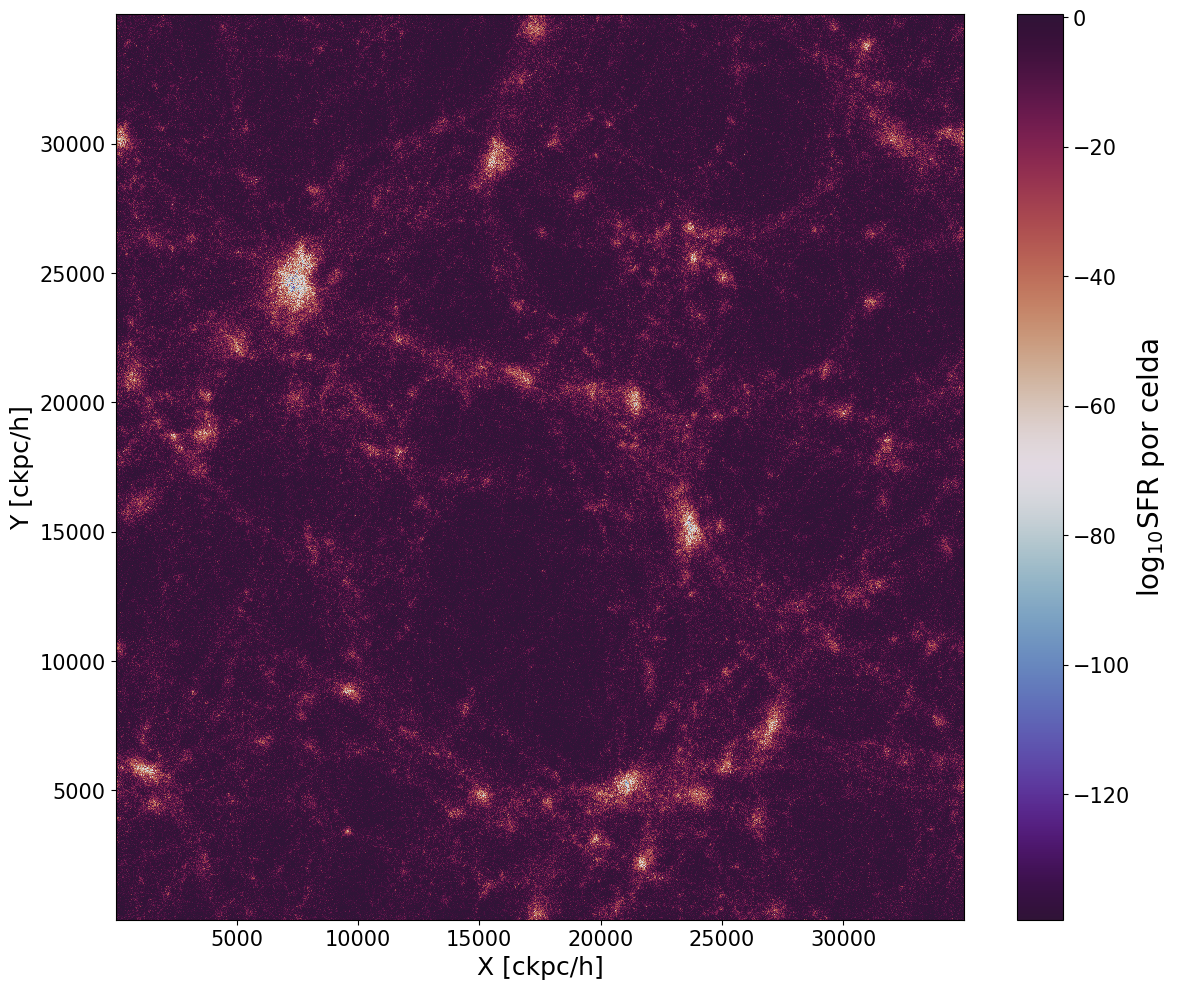

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
data = np.load("TNG099_subhalos_with_jellyfish.npz")
pos = data["SubhaloPos"]
sfr = data["SubhaloSFR"]
jf  = data["JellyfishFlag"]

x = pos[:,0]
y = pos[:,1]

# Definir SFR_log solo para >0
sfr_safe = np.log10(sfr + 1e-4)

# Tamaño del mapa
bins = 2000  

plt.figure(figsize=(12,10))

# Hist2D ponderado por SFR
h = plt.hist2d(
    x, y,
    weights=sfr_safe,    
    bins=bins,
    cmap="twilight_shifted"
    
)

plt.xlabel("X [ckpc/h]", fontsize=18)
plt.ylabel("Y [ckpc/h]", fontsize=18)
colorbar = plt.colorbar(label="⟨ log10(SFR) ⟩ por celda")
colorbar.set_label(r"log$_{10}$SFR por celda", fontsize =20)
colorbar.ax.tick_params(labelsize=15
                       )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np

data = np.load("TNG099_subhalos_with_jellyfish.npz")
sfr = data["SubhaloSFR"]

# --- Censo ---
n_sfr0     = np.sum(sfr == 0)
n_0a1      = np.sum((sfr > 0) & (sfr < 1))
n_mas1     = np.sum(sfr >= 1)

print("Galaxias con SFR = 0 :", n_sfr0)
print("Galaxias con 0 < SFR < 1 :", n_0a1)
print("Galaxias con SFR ≥ 1 :", n_mas1)
print("Total:", len(sfr))

Galaxias con SFR = 0 : 5670560
Galaxias con 0 < SFR < 1 : 16848
Galaxias con SFR ≥ 1 : 705
Total: 5688113


## Parte 2. Limpieza de Datos.


In [16]:
import numpy as np
import pandas as pd

# FINALMENTNE NO OCUPE ESTA FUNCION.
def cargar_y_limpiar(path_npz, remove_outliers=False, outlier_percent=0.99):
    """
    Carga un archivo .npz, combina propiedades relevantes y devuelve un DataFrame limpio.
    - Elimina NaN e infinitos
    - Elimina SFR < 0
    - (Opcional) Elimina outliers de SFR por percentil
    """

    # --------------------------
    # 1. Cargar datos
    # --------------------------
    data = np.load(path_npz)

    # Construcción del DataFrame base
    df = pd.DataFrame({
        "x": data["SubhaloPos"][:,0],
        "y": data["SubhaloPos"][:,1],
        "z": data["SubhaloPos"][:,2],
        "SFR": data["SubhaloSFR"],
        "JF":  data["JellyfishFlag"]
    })

    # --------------------------
    # 2. Limpieza básica
    # --------------------------
    df = df.replace([np.inf, -np.inf], np.nan)
    before = len(df)
    df = df.dropna()
    after_dropna = len(df)

    # Eliminar SFR negativos (inválidos físicamente)
    df = df[df["SFR"] >= 0]
    after_SFRpos = len(df)

    # --------------------------
    # 3. Outliers (opcional)
    # --------------------------
    if remove_outliers:
        threshold = df["SFR"].quantile(outlier_percent)
        df = df[df["SFR"] <= threshold]
        after_outliers = len(df)
    else:
        threshold = None
        after_outliers = after_SFRpos

    # --------------------------
    # 4. Reporte de limpieza
    # --------------------------
    print("=== LIMPIEZA COMPLETADA ===")
    print(f"Filas originales: {before}")
    print(f"Después de dropna()        : {after_dropna}")
    print(f"Después eliminar SFR < 0   : {after_SFRpos}")
    if remove_outliers:
        print(f"Percentil usado: {outlier_percent}")
        print(f"Threshold SFR: {threshold:.3f}")
        print(f"Después eliminar outliers  : {after_outliers}")
    print("-------------------------------")
    print(f"Total final: {len(df)} filas")
    print("===============================")

    return df

df_clean = cargar_y_limpiar("TNG099_subhalos_with_jellyfish.npz")





=== LIMPIEZA COMPLETADA ===
Filas originales: 5688113
Después de dropna()        : 5688113
Después eliminar SFR < 0   : 5688113
-------------------------------
Total final: 5688113 filas


In [17]:
import numpy as np

# Cargar datos
data = np.load("TNG099_subhalos_with_jellyfish.npz")
sfr = data["SubhaloSFR"]

# Percentil elegido (por ejemplo 99%)
p = 0.99
threshold = np.quantile(sfr, p)

# Máscara que deja solo SFR <= threshold
mask = sfr <= threshold

# Cálculos
total_before = len(sfr)
total_after  = np.sum(mask)
removed      = total_before - total_after

print(f"Percentil usado       : {p}")
print(f"Threshold SFR         : {threshold:.4f}")
print(f"Total antes           : {total_before}")
print(f"Total después         : {total_after}")
print(f"Eliminadas (outliers) : {removed}")


Percentil usado       : 0.99
Threshold SFR         : 0.0000
Total antes           : 5688113
Total después         : 5670560
Eliminadas (outliers) : 17553


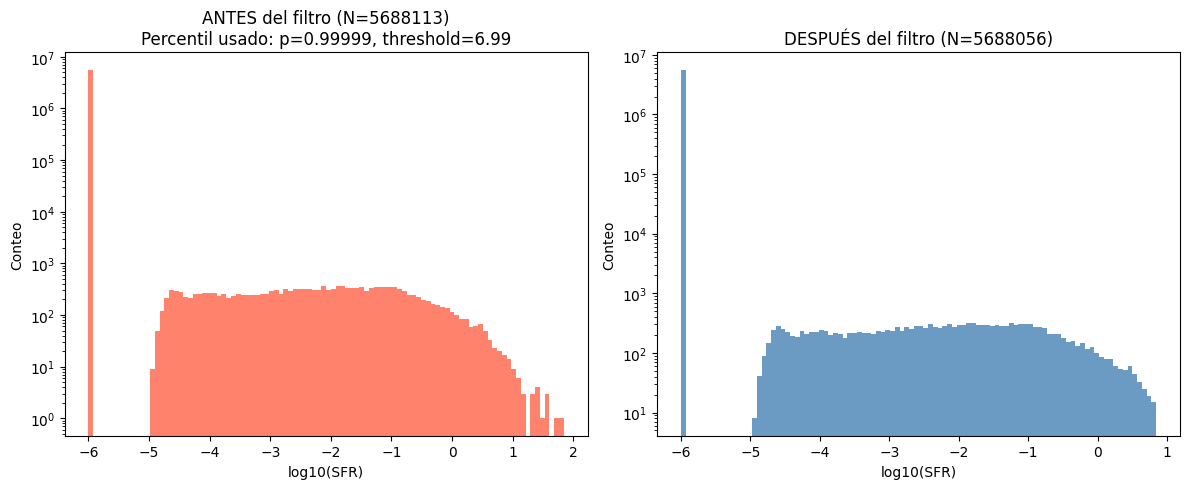

===== RESUMEN =====
Percentil usado: 0.99999
Threshold SFR  : 6.9913
Total antes    : 5688113
Total después  : 5688056
Eliminadas     : 57


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Cargar datos
# -----------------------------------------------------
data = np.load("TNG099_subhalos_with_jellyfish.npz")
sfr = data["SubhaloSFR"]


p = 0.99999
threshold = np.quantile(sfr, p)

sfr_after = sfr[sfr <= threshold]

sfr_before_safe = np.clip(sfr,       1e-6, None)
sfr_after_safe  = np.clip(sfr_after, 1e-6, None)

log_before = np.log10(sfr_before_safe)
log_after  = np.log10(sfr_after_safe)

# -----------------------------------------------------
# Plot: histograma antes y después
# -----------------------------------------------------
plt.figure(figsize=(12,5))

# ----------------------
# ANTES
# ----------------------
plt.subplot(1,2,1)
plt.hist(log_before, bins=100, color="tomato", alpha=0.8)
plt.xlabel("log10(SFR)")
plt.ylabel("Conteo")
plt.title(f"ANTES del filtro (N={len(sfr)})\nPercentil usado: p={p}, threshold={threshold:.2f}")
plt.yscale("log")

# ----------------------
# DESPUÉS
# ----------------------
plt.subplot(1,2,2)
plt.hist(log_after, bins=100, color="steelblue", alpha=0.8)
plt.xlabel("log10(SFR)")
plt.ylabel("Conteo")
plt.title(f"DESPUÉS del filtro (N={len(sfr_after)})")
plt.yscale("log")

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Imprimir cuántas galaxias se eliminaron
# -----------------------------------------------------
removed = len(sfr) - len(sfr_after)

print("===== RESUMEN =====")
print(f"Percentil usado: {p}")
print(f"Threshold SFR  : {threshold:.4f}")
print(f"Total antes    : {len(sfr)}")
print(f"Total después  : {len(sfr_after)}")
print(f"Eliminadas     : {removed}")
print("===================")


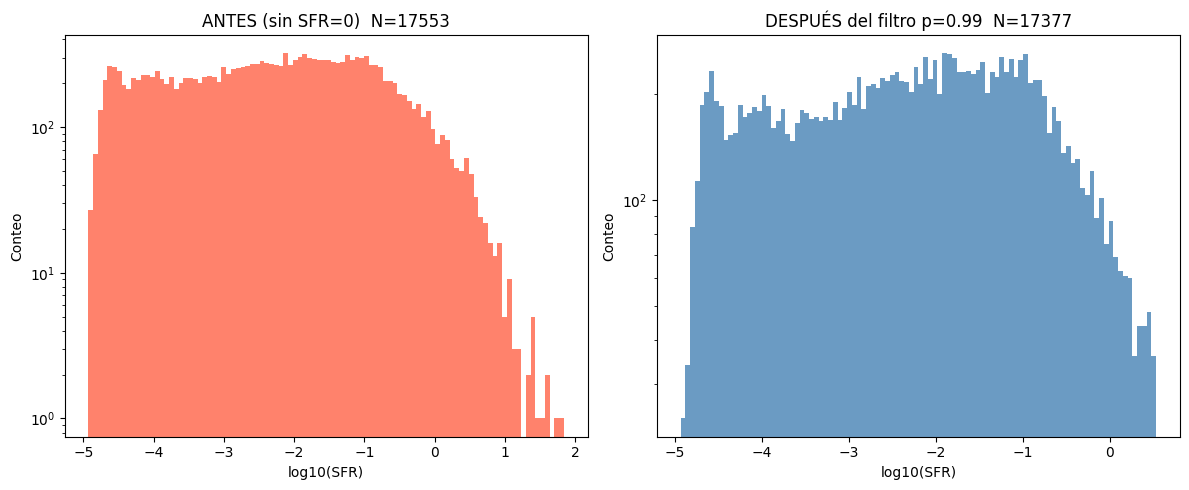

===== RESUMEN =====
SFR = 0 eliminados primero: 5670560
Percentil usado         : 0.99
Threshold seleccionado  : 3.4257
Total >0 antes          : 17553
Total después del corte : 17377
Eliminadas por percentil: 176


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Cargar datos
# -----------------------------------------------------
data = np.load("TNG099_subhalos_with_jellyfish.npz")
sfr = data["SubhaloSFR"]

# -----------------------------------------------------
# 1. Eliminar SFR=0 antes de calcular percentiles
# -----------------------------------------------------
sfr_nozero = sfr[sfr > 0]

# Percentil (ajústalo a lo que quieras)
p = 0.99   # puedes volver a probar valores razonables ahora
threshold = np.quantile(sfr_nozero, p)

# Filtrar valores > 0 y <= threshold
sfr_after = sfr_nozero[sfr_nozero <= threshold]

# -----------------------------------------------------
# Preparar log seguro
# -----------------------------------------------------
before_safe = np.clip(sfr_nozero, 1e-6, None)
after_safe  = np.clip(sfr_after,  1e-6, None)

log_before = np.log10(before_safe)
log_after  = np.log10(after_safe)

# -----------------------------------------------------
# Plot: histograma antes y después
# -----------------------------------------------------
plt.figure(figsize=(12,5))

# ----------------------
# ANTES
# ----------------------
plt.subplot(1,2,1)
plt.hist(log_before, bins=100, color="tomato", alpha=0.8)
plt.xlabel("log10(SFR)")
plt.ylabel("Conteo")
plt.title(f"ANTES (sin SFR=0)  N={len(sfr_nozero)}")
plt.yscale("log")

# ----------------------
# DESPUÉS
# ----------------------
plt.subplot(1,2,2)
plt.hist(log_after, bins=100, color="steelblue", alpha=0.8)
plt.xlabel("log10(SFR)")
plt.ylabel("Conteo")
plt.title(f"DESPUÉS del filtro p={p}  N={len(sfr_after)}")
plt.yscale("log")

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Resumen
# -----------------------------------------------------
removed = len(sfr_nozero) - len(sfr_after)

print("===== RESUMEN =====")
print(f"SFR = 0 eliminados primero: {np.sum(sfr==0)}")
print(f"Percentil usado         : {p}")
print(f"Threshold seleccionado  : {threshold:.4f}")
print(f"Total >0 antes          : {len(sfr_nozero)}")
print(f"Total después del corte : {len(sfr_after)}")
print(f"Eliminadas por percentil: {removed}")
print("====================")


In [106]:
def limpiar_npz_dataframe_simplificado(path, max_removed=20, p0=0.99):
    """
    Limpieza optimizada del catálogo TNG para ML:
    - Elimina variables multidimensionales
    - Elimina flags, IDs, posiciones, spins, velocidades
    - Conserva solo features físicas escalaras relevantes
    - Limpia NaN/inf
    - Aplica percentil adaptativo SOLO a features continuas
    - Preserva ceros en el dataset final, pero no para percentiles
    """

    data = np.load(path)

    # --------------------------------------------
    # 1. DEFINIMOS LAS KEYS QUE VAMOS A CONSERVAR
    # --------------------------------------------
    # Features físicas relevantes para clasificación Jellyfish
    keys_continuas = [
        "SubhaloMass", "SubhaloMassInHalfRad", "SubhaloMassInMaxRad",
        "SubhaloMassInRad", "SubhaloHalfmassRad",
        "SubhaloBHMass", "SubhaloBHMdot",
        "SubhaloBfldDisk", "SubhaloBfldHalo",
        "SubhaloGasMetallicity", "SubhaloGasMetallicityHalfRad",
        "SubhaloGasMetallicityMaxRad", "SubhaloGasMetallicitySfr",
        "SubhaloGasMetallicitySfrWeighted",
        "SubhaloStarMetallicity", "SubhaloStarMetallicityHalfRad",
        "SubhaloStarMetallicityMaxRad",
        "SubhaloVelDisp", "SubhaloVmax", "SubhaloVmaxRad",
        "SubhaloWindMass",
        "SubhaloSFR", "SubhaloSFRinRad", "SubhaloSFRinHalfRad",
        "SubhaloSFRinMaxRad"
    ]

    # Agregamos la etiqueta siempre
    keys_finales = keys_continuas + ["JellyfishFlag"]

    # --------------------------------------------
    # 2. CREAR MÁSCARA GLOBAL INICIAL
    # --------------------------------------------
    N = len(data["JellyfishFlag"])
    mask_global = np.ones(N, dtype=bool)

    print(f"Total inicial de galaxias: {N}")

    # Limpiar NaN/inf SOLO en keys que usamos
    for key in keys_finales:
        arr = data[key]
        mask_global &= ~np.isnan(arr) & ~np.isinf(arr)

    print(f"Después de eliminar NaN/inf: {np.sum(mask_global)}")

    # --------------------------------------------
    # 3. PERCENTIL ADAPTATIVO (ignorando ceros)
    # --------------------------------------------
    for key in keys_continuas:
        arr = data[key][mask_global]

        arr_pos = arr[arr > 0]
        if len(arr_pos) < 20:
            print(f"⚠️ Key '{key}' con pocos valores > 0, saltando percentil.")
            continue

        p = p0
        removed = 99999

        while removed > max_removed and p < 0.99999999:
            threshold = np.quantile(arr_pos, p)
            mask_local = (data[key] <= threshold) | (data[key] == 0)
            removed = np.sum(mask_global & ~mask_local)
            p += (1 - p) * 0.5

        print(f"\n🔹 Key '{key}':")
        print(f"   Percentil final: {p:.9f}")
        print(f"   Threshold: {threshold:.5f}")
        print(f"   Eliminados: {removed}")

        mask_global &= mask_local

    # --------------------------------------------
    # 4. CONSTRUIR DATAFRAME FINAL
    # --------------------------------------------
    df = {key: data[key][mask_global] for key in keys_finales}
    df = pd.DataFrame(df)

    print(f"\n✅ Galaxias finales después de TODAS las limpiezas: {len(df)}")
    print(f"✅ Features finales usados para ML: {len(df.columns)-1}")

    return df, mask_global


# EJECUCIÓN
df_clean, mask = limpiar_npz_dataframe_simplificado(
    "TNG099_subhalos_with_jellyfish.npz"
)


Total inicial de galaxias: 5688113
Después de eliminar NaN/inf: 5688113

🔹 Key 'SubhaloMass':
   Percentil final: 0.999998779
   Threshold: 1369.70801
   Eliminados: 14

🔹 Key 'SubhaloMassInHalfRad':
   Percentil final: 0.999921875
   Threshold: 22.99506
   Eliminados: 16

🔹 Key 'SubhaloMassInMaxRad':
   Percentil final: 0.999998779
   Threshold: 16.61468
   Eliminados: 14

🔹 Key 'SubhaloMassInRad':
   Percentil final: 0.999921875
   Threshold: 29.86566
   Eliminados: 16

🔹 Key 'SubhaloHalfmassRad':
   Percentil final: 0.999998779
   Threshold: 111.95280
   Eliminados: 14

🔹 Key 'SubhaloBHMass':
   Percentil final: 0.997500000
   Threshold: 0.02615
   Eliminados: 20

🔹 Key 'SubhaloBHMdot':
   Percentil final: 0.997500000
   Threshold: 0.00163
   Eliminados: 20

🔹 Key 'SubhaloBfldDisk':
   Percentil final: 0.999843750
   Threshold: 104.92971
   Eliminados: 11

🔹 Key 'SubhaloBfldHalo':
   Percentil final: 0.999921875
   Threshold: 19.27443
   Eliminados: 11

🔹 Key 'SubhaloGasMetallicity'

In [17]:
import numpy as np
import pandas as pd

def limpiar_tng_physically_motivated(path, min_mass_log=8.5):
    """
    Limpieza profesional basada en CRITERIOS FÍSICOS para TNG.
    
    No elimina 'outliers' superiores (como SFR alto o masas grandes) porque son reales.
    Elimina galaxias no resueltas (ruido numérico) y valores físicamente imposibles.
    
    Args:
        path (str): Ruta al archivo .npz
        min_mass_log (float): Log10 de la masa estelar mínima (en M_sun).
                              TNG se vuelve ruidoso bajo 10^8.5 o 10^9 M_sun.
    """
    
    print(f"--- Iniciando limpieza física del archivo: {path} ---")
    data = np.load(path, allow_pickle=True) # allow_pickle por si acaso

    # --------------------------------------------
    # 1. SELECCIÓN DE COLUMNAS
    # --------------------------------------------
    keys_continuas = [
        "SubhaloMass", "SubhaloMassInHalfRad", "SubhaloMassInMaxRad",
        "SubhaloMassInRad", "SubhaloHalfmassRad",
        "SubhaloBHMass", "SubhaloBHMdot",
        "SubhaloBfldDisk", "SubhaloBfldHalo",
        "SubhaloGasMetallicity", "SubhaloGasMetallicityHalfRad",
        "SubhaloGasMetallicityMaxRad", "SubhaloGasMetallicitySfr",
        "SubhaloGasMetallicitySfrWeighted",
        "SubhaloStarMetallicity", "SubhaloStarMetallicityHalfRad",
        "SubhaloStarMetallicityMaxRad",
        "SubhaloVelDisp", "SubhaloVmax", "SubhaloVmaxRad",
        "SubhaloWindMass",
        "SubhaloSFR", "SubhaloSFRinRad", "SubhaloSFRinHalfRad",
        "SubhaloSFRinMaxRad"
    ]
    
    # Keys categóricas o de identificación que necesitamos
    keys_info = ["JellyfishFlag"] # Puedes agregar 'SubfindID' si quieres rastrearlas luego

    all_keys = keys_continuas + keys_info
    
    # Extraemos datos crudos en un diccionario temporal
    # NOTA: TNG Masses están en 10^10 M_sun/h. Vamos a asumir unidades de código por ahora.
    raw_data = {k: data[k] for k in all_keys}
    
    N_inicial = len(raw_data["JellyfishFlag"])
    mask = np.ones(N_inicial, dtype=bool)
    print(f"Galaxias iniciales: {N_inicial}")

    # --------------------------------------------
    # 2. LIMPIEZA TÉCNICA (NaNs e Infs)
    # --------------------------------------------
    for key in keys_continuas:
        arr = raw_data[key]
        # Detectar NaNs o Infinitos
        bad_vals = np.isnan(arr) | np.isinf(arr)
        mask &= ~bad_vals
        
    print(f"Tras eliminar NaNs/Infs: {np.sum(mask)}")

    # --------------------------------------------
    # 3. LIMPIEZA DE RESOLUCIÓN (CRUCIAL)
    # --------------------------------------------
    # Las galaxias muy pequeñas en TNG son ruido. 
    # SubhaloMass está en unidades de 10^10 M_sun/h.
    # Si min_mass_log = 9.0 (10^9 M_sun), en unidades de código es 0.1
    
    mass_threshold_code_units = (10**min_mass_log) / 1e10 
    
    # Usamos SubhaloMass como proxy de resolución
    mask_resolucion = raw_data["SubhaloMass"] > mass_threshold_code_units
    mask &= mask_resolucion
    
    print(f"Tras corte de resolución (M > 10^{min_mass_log} M_sun): {np.sum(mask)}")

    # --------------------------------------------
    # 4. LIMPIEZA DE "IMPOSIBLES FÍSICOS" (Sanity Checks)
    # --------------------------------------------
    
    # A. Metalicidad: No puede ser > 1.0 (fracción de masa)
    # A veces hay errores numéricos que dan 1.00001 o valores locos.
    met_keys = [k for k in keys_continuas if "Metallicity" in k]
    for k in met_keys:
        # Solo cortamos lo absurdo (> 1.0). Dejamos lo alto (0.5, 0.8) que es raro pero posible.
        mask &= (raw_data[k] <= 1.0)
        # Nota: No cortamos < 0, porque 0 es gas primordial.

    # B. Radios: No pueden ser extremadamente pequeños (límite de suavizado)
    # En TNG el softening es ~0.2 - 1 kpc dependiendo de la simulación.
    # Si HalfmassRad < 0.1 kpc, es sospechoso, pero el corte de masa suele encargarse de esto.
    # Lo dejaremos pasar por ahora para no ser agresivos.

    print(f"Tras eliminar imposibles físicos (Metalicidad > 1): {np.sum(mask)}")

    # --------------------------------------------
    # 5. CONSTRUCCIÓN DEL DATAFRAME
    # --------------------------------------------
    # Aplicamos la máscara final
    df = pd.DataFrame({k: raw_data[k][mask] for k in all_keys})
    
    # --------------------------------------------
    # 6. VERIFICACIÓN DE "JELLYFISH"
    # --------------------------------------------
    # Verificamos no haber borrado todas las medusas
    n_jelly = df["JellyfishFlag"].sum()
    print(f"\n--- Resumen Final ---")
    print(f"✅ Galaxias Totales: {len(df)}")
    print(f"🐙 Jellyfish Restantes: {int(n_jelly)} (De las originales)")
    
    if n_jelly < 10:
        print("⚠️ ¡CUIDADO! Quedan muy pocas Jellyfish. Revisa si el corte de masa es muy alto.")

    return df, mask

# EJECUCIÓN
# min_mass_log=8.5 es conservador (aprox 3x10^8 M_sun). 
# Si usas TNG100, quizás mejor 9.0. Si usas TNG50, 8.0 o 8.5 está bien.
df_clean, mask_final = limpiar_tng_physically_motivated(
    "TNG099_subhalos_with_jellyfish.npz", 
    min_mass_log=8.5
)

# Chequeo rápido de tus SFRs altos
print("\nEstadísticas de SFR en el dataset limpio:")
print(df_clean["SubhaloSFR"].describe())

--- Iniciando limpieza física del archivo: TNG099_subhalos_with_jellyfish.npz ---
Galaxias iniciales: 5688113
Tras eliminar NaNs/Infs: 5688113
Tras corte de resolución (M > 10^8.5 M_sun): 220073
Tras eliminar imposibles físicos (Metalicidad > 1): 220073

--- Resumen Final ---
✅ Galaxias Totales: 220073
🐙 Jellyfish Restantes: 45 (De las originales)

Estadísticas de SFR en el dataset limpio:
count    220073.000000
mean          0.015446
std           0.343915
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          69.419174
Name: SubhaloSFR, dtype: float64


In [73]:
import numpy as np
import pandas as pd

def limpiar_tng_sin_perder_jellyfish(path, margen_seguridad=0.9):
    """
    Limpieza inteligente que ajusta el umbral de masa basándose en
    la galaxia Jellyfish más pequeña encontrada.
    """
    
    print(f"--- Iniciando limpieza adaptativa: {path} ---")
    data = np.load(path, allow_pickle=True)

    # 1. Definir Keys
    keys_continuas = [
        "SubhaloMass", "SubhaloMassInHalfRad", "SubhaloMassInMaxRad",
        "SubhaloMassInRad", "SubhaloHalfmassRad",
        "SubhaloBHMass", "SubhaloBHMdot",
        "SubhaloBfldDisk", "SubhaloBfldHalo",
        "SubhaloGasMetallicity", "SubhaloGasMetallicityHalfRad",
        "SubhaloGasMetallicityMaxRad", "SubhaloGasMetallicitySfr",
        "SubhaloGasMetallicitySfrWeighted",
        "SubhaloStarMetallicity", "SubhaloStarMetallicityHalfRad",
        "SubhaloStarMetallicityMaxRad",
        "SubhaloVelDisp", "SubhaloVmax", "SubhaloVmaxRad",
        "SubhaloWindMass",
        "SubhaloSFR", "SubhaloSFRinRad", "SubhaloSFRinHalfRad",
        "SubhaloSFRinMaxRad"
    ]
    keys_info = ["JellyfishFlag"] # + IDs si quieres

    all_keys = keys_continuas + keys_info
    raw_data = {k: data[k] for k in all_keys}
    
    N = len(raw_data["JellyfishFlag"])
    mask = np.ones(N, dtype=bool)
    
    # --------------------------------------------
    # 2. LIMPIEZA TÉCNICA (NaN / Inf)
    # --------------------------------------------
    for key in keys_continuas:
        arr = raw_data[key]
        mask &= ~np.isnan(arr) & ~np.isinf(arr)
    
    print(f"Valid after NaN check: {np.sum(mask)}")

    # --------------------------------------------
    # 3. ENCONTRAR EL LÍMITE DE MASA SEGURO
    # --------------------------------------------
    # Extraemos masa y flags de las galaxias que YA pasaron el filtro de NaN
    masas = raw_data["SubhaloMass"]
    flags = raw_data["JellyfishFlag"]
    
    # Buscamos la masa mínima entre las que SON Jellyfish (y no son NaN)
    # Usamos la máscara actual para no mirar índices corruptos
    masas_jelly = masas[(flags == 1) & mask]
    
    if len(masas_jelly) == 0:
        print("⚠️ ERROR CRÍTICO: No hay Jellyfish válidas (quizás tienen NaNs).")
        return None, None

    min_mass_jelly = np.min(masas_jelly)
    
    # Aplicamos un margen de seguridad (ej. 90% de la masa mínima encontrada)
    # para no dejar justo a la pobre medusa en el borde.
    umbral_masa = min_mass_jelly * margen_seguridad
    
    # Convertimos a log10 para imprimirlo bonito (recuerda unidades 10^10)
    log_mass_real = np.log10(umbral_masa * 1e10)
    
    print(f"\n🔹 AJUSTE AUTOMÁTICO DE MASA:")
    print(f"   Masa de la Jellyfish más pequeña: {min_mass_jelly:.6f} (código) -> 10^{np.log10(min_mass_jelly*1e10):.2f} M_sun")
    print(f"   Nuevo umbral de corte aplicado:   {umbral_masa:.6f} (código) -> 10^{log_mass_real:.2f} M_sun")
    
    # APLICAMOS EL CORTE DE MASA A TODOS
    # (Es importante cortar a los No-Jellyfish también en este umbral 
    # para que el modelo aprenda a distinguir en ese rango de masas bajas)
    mask &= (masas >= umbral_masa)

    print(f"Tras corte de masa adaptativo: {np.sum(mask)}")

    # --------------------------------------------
    # 4. LIMPIEZA DE IMPOSIBLES (Solo Metalicidad > 1)
    # --------------------------------------------
    met_keys = [k for k in keys_continuas if "Metallicity" in k]
    for k in met_keys:
        mask &= (raw_data[k] <= 1.0) 

    # --------------------------------------------
    # 5. RESULTADO
    # --------------------------------------------
    df = pd.DataFrame({k: raw_data[k][mask] for k in all_keys})
    
    n_jelly_final = df["JellyfishFlag"].sum()
    print(f"\n✅ Galaxias finales: {len(df)}")
    print(f"🐙 Jellyfish salvadas: {int(n_jelly_final)}")
    
    return df, mask

# EJECUCIÓN
df_clean, mask = limpiar_tng_sin_perder_jellyfish("TNG099_subhalos_with_jellyfish.npz")

--- Iniciando limpieza adaptativa: TNG099_subhalos_with_jellyfish.npz ---
Valid after NaN check: 5688113

🔹 AJUSTE AUTOMÁTICO DE MASA:
   Masa de la Jellyfish más pequeña: 0.000645 (código) -> 10^6.81 M_sun
   Nuevo umbral de corte aplicado:   0.000581 (código) -> 10^6.76 M_sun
Tras corte de masa adaptativo: 5688042

✅ Galaxias finales: 5688042
🐙 Jellyfish salvadas: 118


In [74]:
df_clean.to_pickle("tng099_clean.pkl")

In [4]:
df = pd.read_pickle("tng099_clean.pkl")


## Parte 3 Crearcion del Random Forest


236
236

Buscando mejores hiperparámetros...

Fitting 3 folds for each of 4 candidates, totalling 12 fits

=== MEJORES HIPERPARÁMETROS ===
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Mejor F1-score en validación: 0.8342902467270292

=== DESEMPEÑO EN TEST ===
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.85      0.71      0.77        24

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48


F1-test (macro): 0.7902097902097902


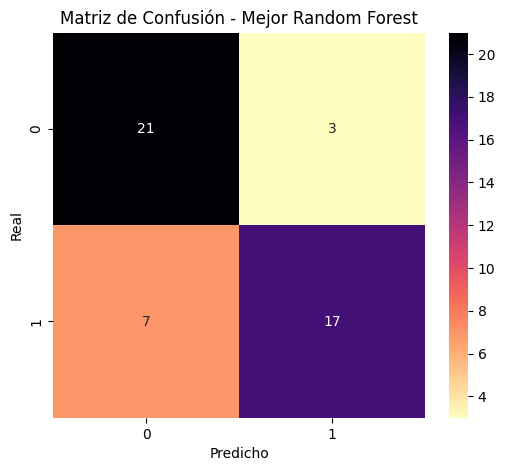

/tmp/ipykernel_2636464/631534470.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:20], y=importances.index[:20], palette="viridis")


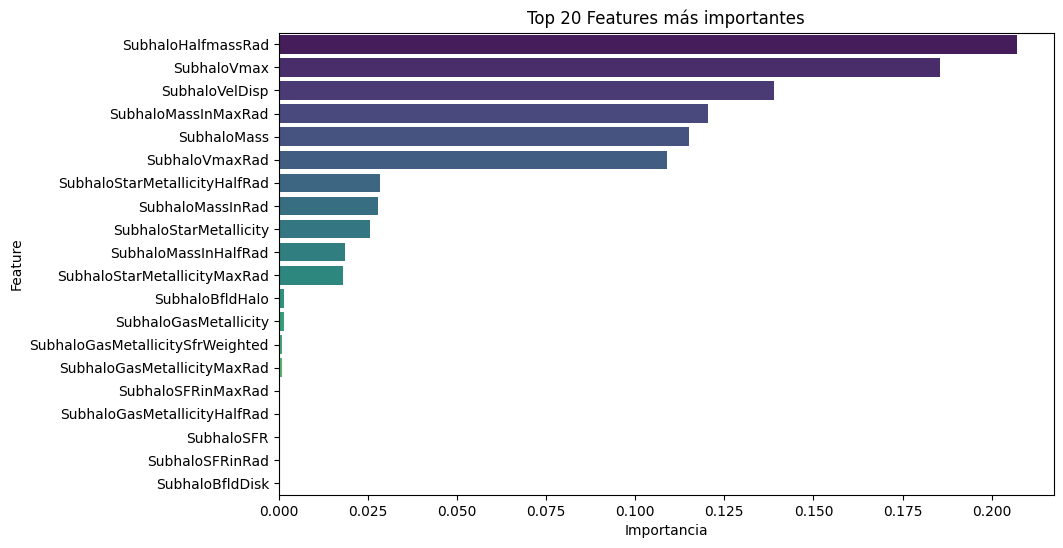


Top 10 features más importantes:
SubhaloHalfmassRad               0.207059
SubhaloVmax                      0.185629
SubhaloVelDisp                   0.138866
SubhaloMassInMaxRad              0.120307
SubhaloMass                      0.115197
SubhaloVmaxRad                   0.108997
SubhaloStarMetallicityHalfRad    0.028342
SubhaloMassInRad                 0.027798
SubhaloStarMetallicity           0.025484
SubhaloMassInHalfRad             0.018651
dtype: float64


In [78]:
# ====================================================
# IMPORTS
# ====================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    classification_report,
    make_scorer
)
import seaborn as sns
import matplotlib.pyplot as plt


# df_clean es el DataFrame que generamos en la limpieza

df_jelly = df.copy()

df_jf = df_jelly[df_jelly["JellyfishFlag"] == 1]

# Usar 1:10 o 1:20 en lugar de 1:4
df_nj = df_jelly[(df_jelly["JellyfishFlag"] == 0)].sample(
    n=len(df_jf) ,  # 1770 no-jellies
    random_state=42
)

df_bal = pd.concat([df_jf, df_nj]).sample(frac=1, random_state=42)




X = df_bal.drop("JellyfishFlag", axis=1)
y = df_bal["JellyfishFlag"]

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)




f1_macro = make_scorer(f1_score, average="macro")



param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"],
    "class_weight": ["balanced"]
}


rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    rf_base,
    param_grid,
    scoring=f1_macro,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("\nBuscando mejores hiperparámetros...\n")
grid.fit(X_train, y_train)



print("\n=== MEJORES HIPERPARÁMETROS ===")
print(grid.best_params_)
print("\nMejor F1-score en validación:", grid.best_score_)


best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("\n=== DESEMPEÑO EN TEST ===")
print(classification_report(y_test, y_pred))

f1_test = f1_score(y_test, y_pred, average="macro")
print("\nF1-test (macro):", f1_test)



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma_r")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Mejor Random Forest")
plt.show()


importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette="viridis")
plt.title("Top 20 Features más importantes")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.show()

print("\nTop 10 features más importantes:")
print(importances.head(10))


## Parte 4 Random forest para SFR.

Eliminando columnas relacionadas con SFR:
 - SubhaloSFRinRad
 - SubhaloSFRinHalfRad
 - SubhaloSFRinMaxRad

Tamaño final del DF: (5687773, 23)

Dataset usado para regresión: 500000
Train size: 400000
Test size : 100000

=== BUSCANDO MEJORES HIPERPARÁMETROS... ===

Fitting 3 folds for each of 32 candidates, totalling 96 fits

=== MEJORES HIPERPARÁMETROS ===
{'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

=== RESULTADOS EN TEST ===
RMSE: 0.01563
R²:   0.72763


/tmp/ipykernel_3590705/737386441.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:20], y=importances.index[:20], palette="viridis")


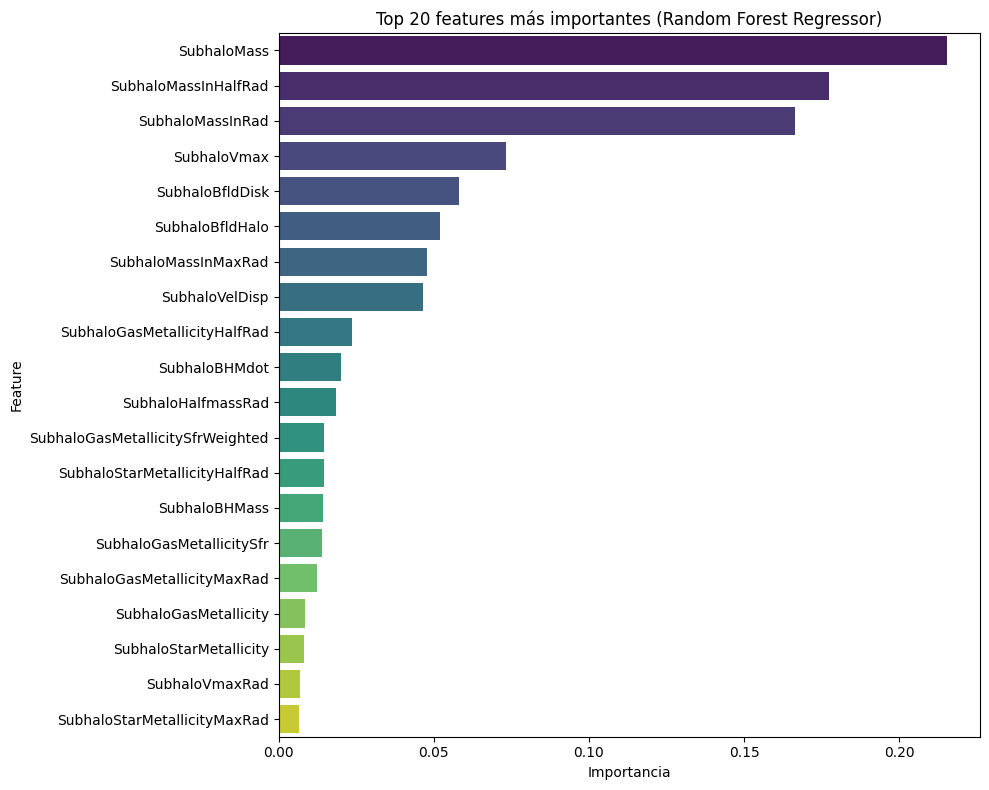

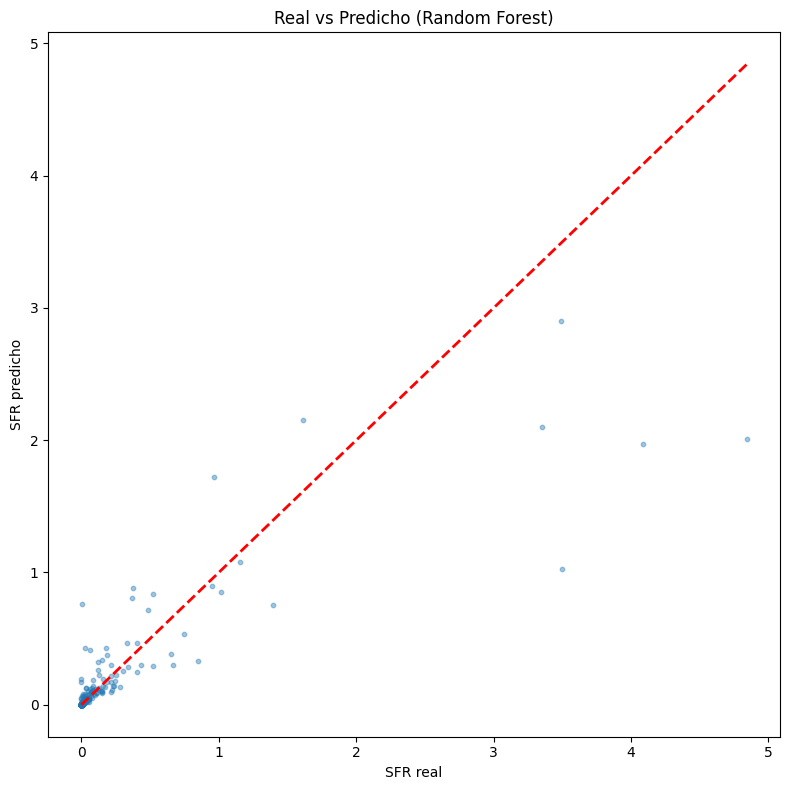

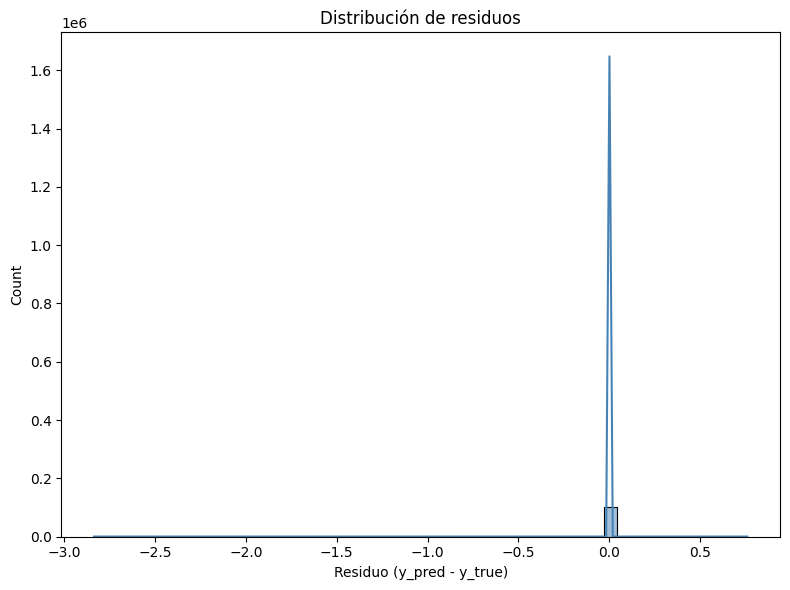

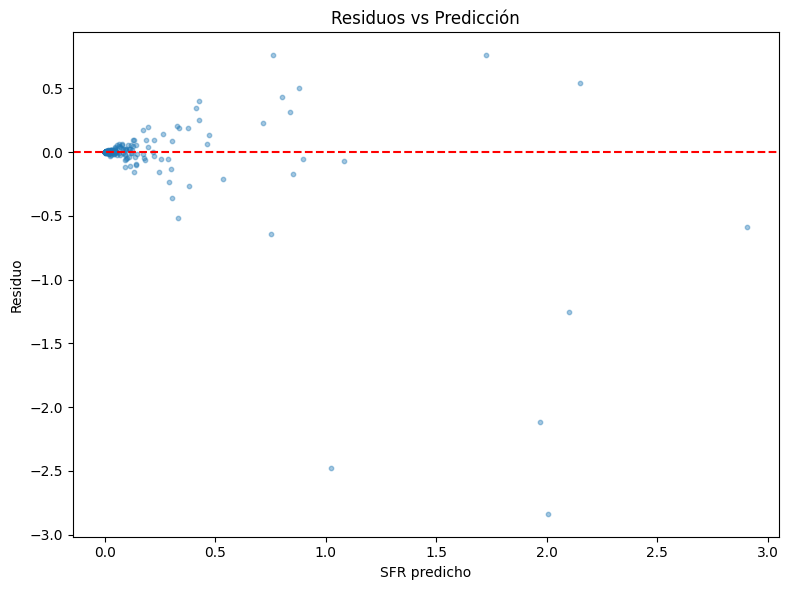

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor

df_reg = df.copy()

cols_sfr = [col for col in df_reg.columns if "SFR" in col]
cols_sfr.remove("SubhaloSFR")

print("Eliminando columnas relacionadas con SFR:")
for c in cols_sfr:
    print(" -", c)

df_reg = df_reg.drop(columns=cols_sfr)
print("\nTamaño final del DF:", df_reg.shape)

df_sample = df_reg.sample(
    n=min(500_000, len(df_reg)),
    random_state=42
)

print("\nDataset usado para regresión:", len(df_sample))

X = df_sample.drop("SubhaloSFR", axis=1)
y = df_sample["SubhaloSFR"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))

neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", 0.8]
}

rf = RandomForestRegressor(
    n_jobs=-1,
    random_state=42
)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring=neg_mse,
    verbose=1
)

print("\n=== BUSCANDO MEJORES HIPERPARÁMETROS... ===\n")
grid.fit(X_train, y_train)

print("\n=== MEJORES HIPERPARÁMETROS ===")
print(grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("\n=== RESULTADOS EN TEST ===")
print(f"RMSE: {rmse:.5f}")
print(f"R²:   {r2:.5f}")

importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette="viridis")
plt.title("Top 20 features más importantes (Random Forest Regressor)")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, s=10, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("SFR real")
plt.ylabel("SFR predicho")
plt.title("Real vs Predicho (Random Forest)")
plt.tight_layout()
plt.show()

residuals = y_pred - y_test

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True, color="steelblue")
plt.xlabel("Residuo (y_pred - y_true)")
plt.title("Distribución de residuos")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.4, s=10)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("SFR predicho")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicción")
plt.tight_layout()
plt.show()

Eliminando features redundantes de SFR: ['SubhaloSFRinRad', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad']

Entrenando modelo de Regresión...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}

--- Métricas Globales ---
RMSE: 0.0334 M_sun/yr (Error promedio en unidades absolutas)
R2:   0.5200 (Qué tan bien sigue la tendencia)


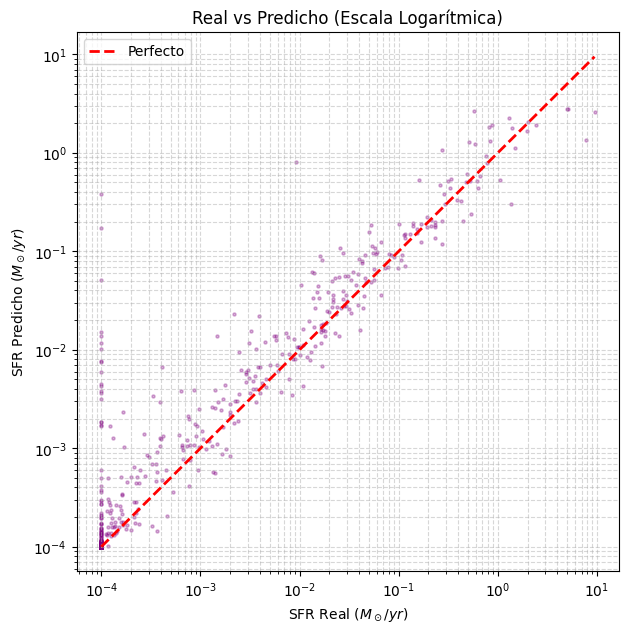

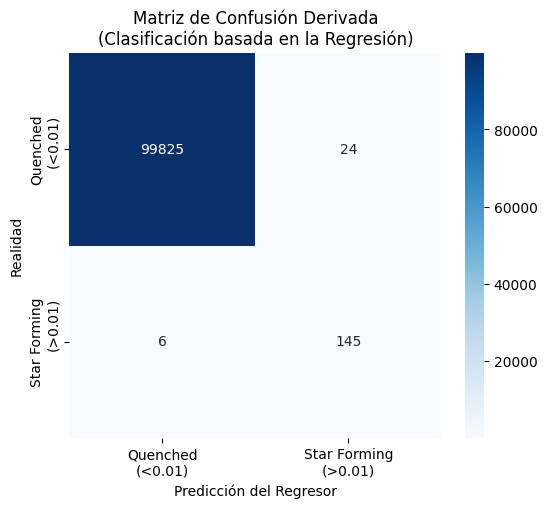


Explicación de la Matriz:
Esta matriz te dice si, aunque el modelo erre en el número exacto,
al menos acierta en decir si la galaxia está viva o muerta.
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=800; total time=   2.3s
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=0.3, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=0.3, min_samples_leaf=8, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=0.5, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   1.0s
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END class_weight={0: 1, 1: 20}, max_depth=40, max_features=0.5, min_samples_leaf=8, min_samples_split

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

df_reg = df.copy()

cols_sfr = [col for col in df_reg.columns if "SFR" in col]
if "SubhaloSFR" in cols_sfr:
    cols_sfr.remove("SubhaloSFR")
print("Eliminando features redundantes de SFR:", cols_sfr)
df_reg = df_reg.drop(columns=cols_sfr)

df_sample = df_reg.sample(n=min(500_000, len(df_reg)), random_state=42)
X = df_sample.drop("SubhaloSFR", axis=1)
y = df_sample["SubhaloSFR"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    "n_estimators": [150],
    "max_depth": [15, None],
    "min_samples_leaf": [2, 4],
    "max_features": ["sqrt"]
}

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
grid = GridSearchCV(
    rf, param_grid, cv=3, 
    scoring="neg_mean_squared_error", verbose=1
)

print("\nEntrenando modelo de Regresión...")
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("\nMejores parámetros:", grid.best_params_)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"\n--- Métricas Globales ---")
print(f"RMSE: {rmse:.4f} M_sun/yr")
print(f"R2:   {r2:.4f}")

plt.figure(figsize=(7, 7))
eps = 1e-4 
plt.scatter(y_test + eps, y_pred + eps, s=5, alpha=0.3, c='purple')
min_val = min(y_test.min(), y_pred.min()) + eps
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Perfecto")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SFR Real ($M_\odot/yr$)")
plt.ylabel("SFR Predicho ($M_\odot/yr$)")
plt.title("Real vs Predicho (Escala Logarítmica)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

umbral_sfr = 0.01
y_test_class = y_test > umbral_sfr
y_pred_class = y_pred > umbral_sfr
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6, 5))
labels = [f"Quenched\n(<{umbral_sfr})", f"Star Forming\n(>{umbral_sfr})"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión Derivada")
plt.ylabel("Realidad")
plt.xlabel("Predicción del Regresor")
plt.show()

print("\nExplicación de la Matriz:")
print("Esta matriz indica si el modelo acierta en clasificar la galaxia como formadora de estrellas o quenched.")

ANÁLISIS EXPLORATORIO - Distribución de SFR

Dataset original: 5,688,042 galaxias
Features totales: 26

--- Estadísticas SFR ---
count    5.688042e+06
mean     6.036019e-04
std      6.771741e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.941917e+01
Name: SubhaloSFR, dtype: float64
SFR = 0: 5,670,489 (99.7%)
SFR > 0: 17,553 (0.3%)


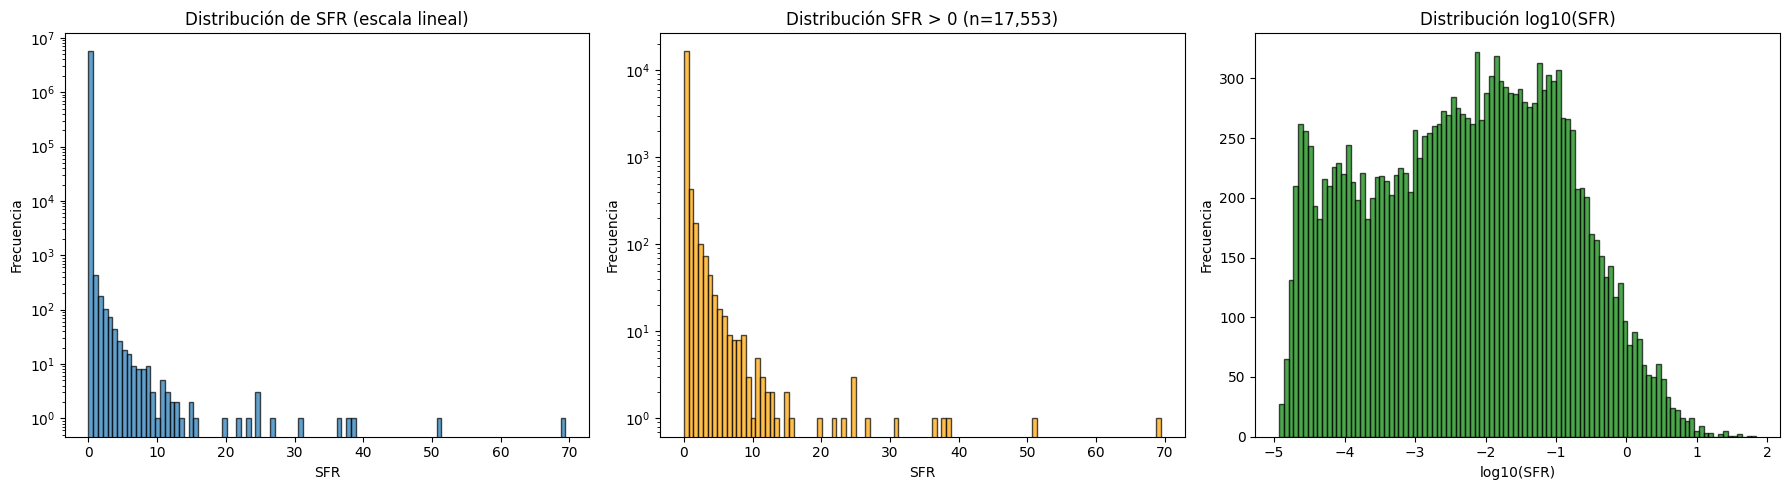


LIMPIEZA DE FEATURES - Eliminar leakage de SFR

Eliminando 3 columnas relacionadas con SFR:
  - SubhaloSFRinRad
  - SubhaloSFRinHalfRad
  - SubhaloSFRinMaxRad

⚠️  Columnas potencialmente relacionadas con formación estelar:
  - SubhaloStarMetallicity
  - SubhaloStarMetallicityHalfRad
  - SubhaloStarMetallicityMaxRad
Considera si estas features causan leakage

Shape final: (5688042, 23)

SAMPLING DEL DATASET

Opciones de sampling:
A) Solo galaxias con SFR > 0 (predecir intensidad de formación)
B) Todas las galaxias (predecir SFR incluyendo ceros)

→ Usando solo galaxias con SFR > 0: 17,553
Dataset final para regresión: 17,553
Features: 22

Skewness de SFR: 26.41
→ SFR muy sesgado, considerar transformación log
→ Aplicando log10(SFR) como target

Train: 14,042 muestras
Test:  3,511 muestras
SFR train - min: -4.9291, max: 1.8415, mean: -2.2949
SFR test  - min: -4.9180, max: 1.7103, mean: -2.2999

CONFIGURACIÓN GRID SEARCH
Combinaciones: 324

ENTRENAMIENTO
Fitting 5 folds for each of 324 

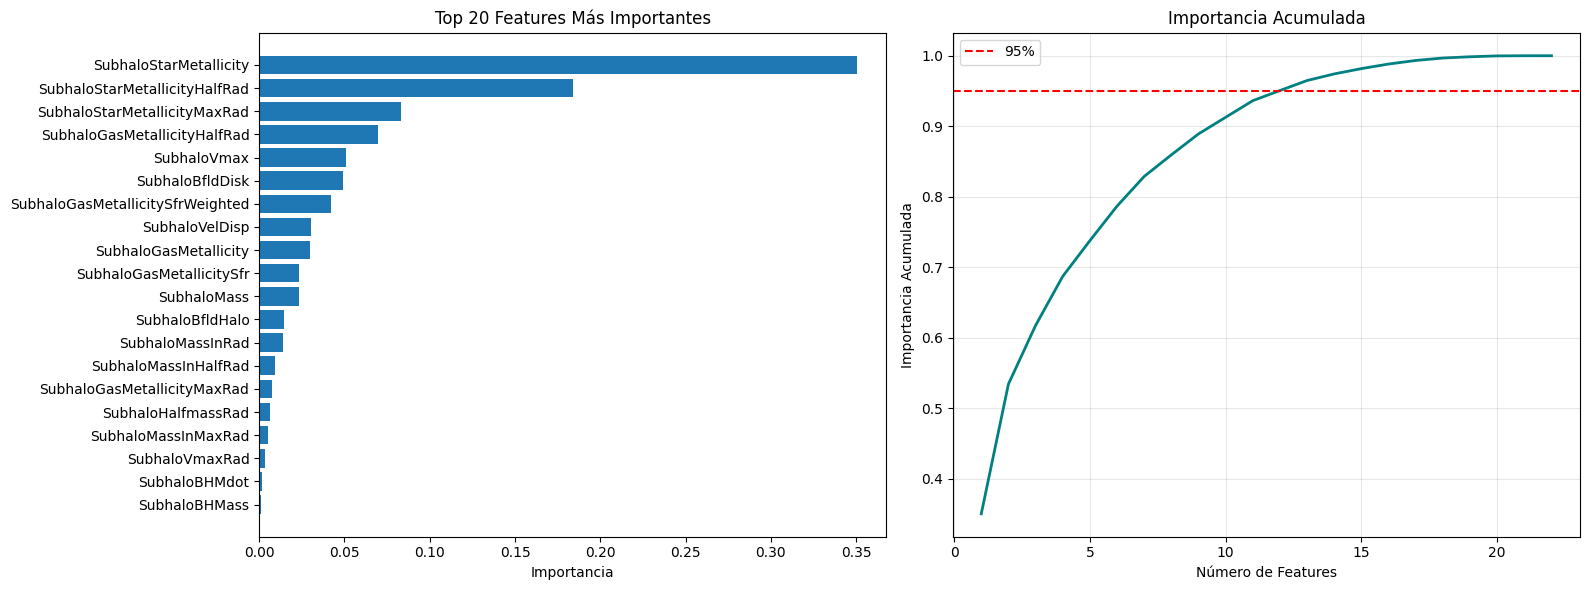


--- Top 15 Features ---
SubhaloStarMetallicity              0.350278
SubhaloStarMetallicityHalfRad       0.183918
SubhaloStarMetallicityMaxRad        0.083233
SubhaloGasMetallicityHalfRad        0.069656
SubhaloVmax                         0.050615
SubhaloBfldDisk                     0.048969
SubhaloGasMetallicitySfrWeighted    0.042113
SubhaloVelDisp                      0.030616
SubhaloGasMetallicity               0.029716
SubhaloGasMetallicitySfr            0.023592
SubhaloMass                         0.023553
SubhaloBfldHalo                     0.014393
SubhaloMassInRad                    0.014199
SubhaloMassInHalfRad                0.009362
SubhaloGasMetallicityMaxRad         0.007534
dtype: float64

Features para 95%: 12/22


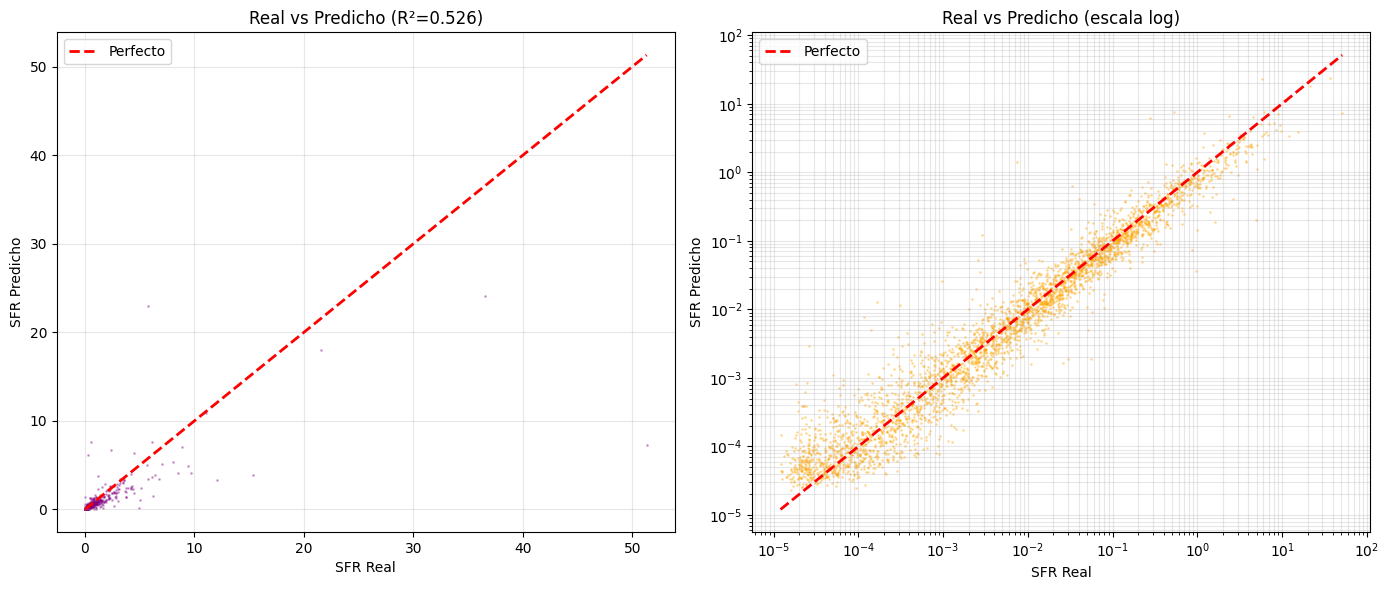

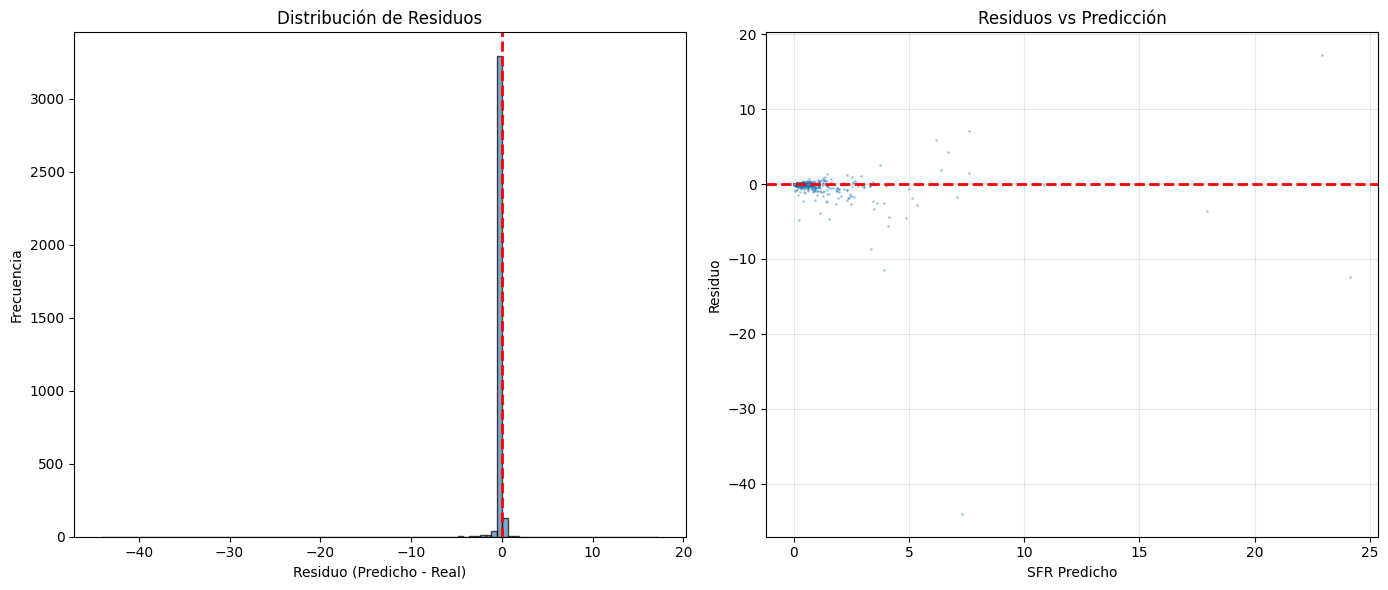


DESEMPEÑO POR RANGOS DE SFR
P0-P25: R²=-63.235, MAE=0.00016, n=878
P25-P50: R²=-9.311, MAE=0.00131, n=878
P50-P75: R²=-12.093, MAE=0.01202, n=877
P75-P90: R²=-12.876, MAE=0.06135, n=527
P90-P100: R²=0.440, MAE=0.80605, n=351

✅ ¡Regresión completada!

💾 Para guardar el modelo:
   import joblib
   joblib.dump(best_model, 'sfr_regressor.pkl')


In [83]:
# ============================================================
# IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    make_scorer,
    mean_absolute_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


print("="*60)
print("ANÁLISIS EXPLORATORIO - Distribución de SFR")
print("="*60)

df_reg = df.copy()

print(f"\nDataset original: {len(df_reg):,} galaxias")
print(f"Features totales: {len(df_reg.columns)}")

# Estadísticas de SFR ANTES de cualquier filtro
print("\n--- Estadísticas SFR ---")
print(df_reg['SubhaloSFR'].describe())
print(f"SFR = 0: {(df_reg['SubhaloSFR']==0).sum():,} ({(df_reg['SubhaloSFR']==0).sum()/len(df_reg)*100:.1f}%)")
print(f"SFR > 0: {(df_reg['SubhaloSFR']>0).sum():,} ({(df_reg['SubhaloSFR']>0).sum()/len(df_reg)*100:.1f}%)")

# Visualizar distribucion
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribucion completa
axes[0].hist(df_reg['SubhaloSFR'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('SFR')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de SFR (escala lineal)')
axes[0].set_yscale('log')

# Solo SFR > 0
sfr_positive = df_reg[df_reg['SubhaloSFR'] > 0]['SubhaloSFR']
axes[1].hist(sfr_positive, bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('SFR')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title(f'Distribución SFR > 0 (n={len(sfr_positive):,})')
axes[1].set_yscale('log')

# Log-scale (SFR > 0)
axes[2].hist(np.log10(sfr_positive + 1e-10), bins=100, edgecolor='black', alpha=0.7, color='green')
axes[2].set_xlabel('log10(SFR)')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Distribución log10(SFR)')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("LIMPIEZA DE FEATURES - Eliminar leakage de SFR")
print("="*60)

cols_sfr = [col for col in df_reg.columns if "SFR" in col and col != "SubhaloSFR"]

if len(cols_sfr) > 0:
    print(f"\nEliminando {len(cols_sfr)} columnas relacionadas con SFR:")
    for c in cols_sfr:
        print(f"  - {c}")
    df_reg = df_reg.drop(columns=cols_sfr)
else:
    print("\n No hay columnas SFR adicionales que eliminar")

# Verificar si hay otras columnas sospechosas
suspicious_cols = [col for col in df_reg.columns if any(
    keyword in col.lower() 
    for keyword in ['star', 'stellar', 'formation']
) and col != "SubhaloSFR"]

if len(suspicious_cols) > 0:
    print(f"\n  Columnas potencialmente relacionadas con formación estelar:")
    for c in suspicious_cols:
        print(f"  - {c}")
    print("Considera si estas features causan leakage")

print(f"\nShape final: {df_reg.shape}")


print("\n" + "="*60)
print("SAMPLING DEL DATASET")
print("="*60)

print("\nOpciones de sampling:")
print("A) Solo galaxias con SFR > 0 (predecir intensidad de formación)")
print("B) Todas las galaxias (predecir SFR incluyendo ceros)")

df_active = df_reg[df_reg['SubhaloSFR'] > 0].copy()
print(f"\n→ Usando solo galaxias con SFR > 0: {len(df_active):,}")

# Sample de 500k (o menos si no hay suficientes)
sample_size = min(500_000, len(df_active))
df_sample = df_active.sample(n=sample_size, random_state=42)

print(f"Dataset final para regresión: {len(df_sample):,}")
print(f"Features: {df_sample.shape[1] - 1}")

X = df_sample.drop("SubhaloSFR", axis=1)
y = df_sample["SubhaloSFR"]


skewness = y.skew()
print(f"\nSkewness de SFR: {skewness:.2f}")

if skewness > 2:
    print(" SFR muy sesgado, considerar transformación log")
    use_log = True
    y_original = y.copy()
    y = np.log10(y + 1e-10)
    print(" Aplicando log10(SFR) como target")
else:
    use_log = False
    print(" Usando SFR sin transformar")


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\nTrain: {len(X_train):,} muestras")
print(f"Test:  {len(X_test):,} muestras")
print(f"SFR train - min: {y_train.min():.4f}, max: {y_train.max():.4f}, mean: {y_train.mean():.4f}")
print(f"SFR test  - min: {y_test.min():.4f}, max: {y_test.max():.4f}, mean: {y_test.mean():.4f}")


print("\n" + "="*60)
print("CONFIGURACIÓN GRID SEARCH")
print("="*60)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [15, 25, 40, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", 0.5, 0.8],
    "min_samples_leaf": [1, 2, 5]
}

print(f"Combinaciones: {np.prod([len(v) for v in param_grid.values()])}")

neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

rf = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    oob_score=True  # Validación adicional
)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # Aumentado a 5 folds
    scoring=neg_mse,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)


print("\n" + "="*60)
print("ENTRENAMIENTO")
print("="*60)

grid.fit(X_train, y_train)

print("\n" + "="*60)
print("MEJORES HIPERPARÁMETROS")
print("="*60)
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor score (neg-MSE): {grid.best_score_:.6f}")

results_df = pd.DataFrame(grid.cv_results_)
top_5 = results_df.nsmallest(5, 'rank_test_score')[
    ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
]
print("\n--- Top 5 configuraciones ---")
print(top_5.to_string())

print("\n" + "="*60)
print("EVALUACIÓN EN TEST")
print("="*60)

best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

if use_log:
    y_train_eval = 10 ** y_train
    y_test_eval = 10 ** y_test
    y_pred_train_eval = 10 ** y_pred_train
    y_pred_test_eval = 10 ** y_pred_test
else:
    y_train_eval = y_train
    y_test_eval = y_test
    y_pred_train_eval = y_pred_train
    y_pred_test_eval = y_pred_test

# Métricas completas
def evaluate_model(y_true, y_pred, set_name="Test"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # MAPE solo si no hay ceros
    if (y_true > 0).all():
        mape = mean_absolute_percentage_error(y_true, y_pred)
    else:
        mape = np.nan
    
    print(f"\n--- {set_name} Set ---")
    print(f"RMSE:  {rmse:.6f}")
    print(f"MAE:   {mae:.6f}")
    print(f"R²:    {r2:.6f}")
    if not np.isnan(mape):
        print(f"MAPE:  {mape*100:.2f}%")
    
    return rmse, mae, r2

rmse_train, mae_train, r2_train = evaluate_model(y_train_eval, y_pred_train_eval, "Train")
rmse_test, mae_test, r2_test = evaluate_model(y_test_eval, y_pred_test_eval, "Test")

print(f"\n>>> OOB Score: {best_model.oob_score_:.6f} <<<")

# Verificar overfitting
print(f"\n--- Diagnóstico de Overfitting ---")
print(f"R² Train: {r2_train:.4f}")
print(f"R² Test:  {r2_test:.4f}")
print(f"Diferencia: {abs(r2_train - r2_test):.4f}")

if r2_train - r2_test > 0.1:
    print("  Posible overfitting (diferencia > 0.1)")
elif r2_train - r2_test > 0.05:
    print(" Leve overfitting (diferencia 0.05-0.1)")
else:
    print(" Sin overfitting significativo")



# 9.1) Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_n = min(20, len(importances))
axes[0].barh(range(top_n), importances.values[:top_n])
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(importances.index[:top_n])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importancia')
axes[0].set_title(f'Top {top_n} Features Más Importantes')

cumsum = np.cumsum(importances.values)
axes[1].plot(range(1, len(cumsum)+1), cumsum, linewidth=2, color='teal')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95%')
axes[1].set_xlabel('Número de Features')
axes[1].set_ylabel('Importancia Acumulada')
axes[1].set_title('Importancia Acumulada')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n--- Top 15 Features ---")
print(importances.head(15))

n_features_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nFeatures para 95%: {n_features_95}/{len(importances)}")

# 9.2) Real vs Predicho
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test_eval, y_pred_test_eval, s=1, alpha=0.3, c='purple')
axes[0].plot([y_test_eval.min(), y_test_eval.max()], 
             [y_test_eval.min(), y_test_eval.max()], 
             "r--", lw=2, label='Perfecto')
axes[0].set_xlabel('SFR Real')
axes[0].set_ylabel('SFR Predicho')
axes[0].set_title(f'Real vs Predicho (R²={r2_test:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log-log scale para ver mejor
axes[1].scatter(y_test_eval, y_pred_test_eval, s=1, alpha=0.3, c='orange')
axes[1].plot([y_test_eval.min(), y_test_eval.max()], 
             [y_test_eval.min(), y_test_eval.max()], 
             "r--", lw=2, label='Perfecto')
axes[1].set_xlabel('SFR Real')
axes[1].set_ylabel('SFR Predicho')
axes[1].set_title('Real vs Predicho (escala log)')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# 9.3) Residuos
residuals = y_pred_test_eval - y_test_eval

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(residuals, bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Residuo (Predicho - Real)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Residuos')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)

axes[1].scatter(y_pred_test_eval, residuals, s=1, alpha=0.3)
axes[1].axhline(0, color="red", linestyle="--", linewidth=2)
axes[1].set_xlabel('SFR Predicho')
axes[1].set_ylabel('Residuo')
axes[1].set_title('Residuos vs Predicción')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9.4) Análisis por rangos de SFR
print("\n" + "="*60)
print("DESEMPEÑO POR RANGOS DE SFR")
print("="*60)

percentiles = [0, 25, 50, 75, 90, 100]
bins = np.percentile(y_test_eval, percentiles)
bin_labels = [f"P{percentiles[i]}-P{percentiles[i+1]}" for i in range(len(bins)-1)]

y_test_binned = pd.cut(y_test_eval, bins=bins, labels=bin_labels, include_lowest=True)

for label in bin_labels:
    mask = y_test_binned == label
    if mask.sum() > 0:
        r2_bin = r2_score(y_test_eval[mask], y_pred_test_eval[mask])
        mae_bin = mean_absolute_error(y_test_eval[mask], y_pred_test_eval[mask])
        print(f"{label}: R²={r2_bin:.3f}, MAE={mae_bin:.5f}, n={mask.sum()}")

print("\n ¡Regresión completada!")
print("\n Para guardar el modelo:")
print("   import joblib")
print("   joblib.dump(best_model, 'sfr_regressor.pkl')")

In [84]:
import joblib

# Supongamos que 'best_model' es tu Random Forest ya entrenado y optimizado
nombre_archivo = "modelo_sfr_tng_v1.pkl"

print(f"Guardando modelo en {nombre_archivo}...")
joblib.dump(best_model, nombre_archivo)

print("¡Modelo guardado! Ahora puedes cerrar este notebook o apagar el PC.")

Guardando modelo en modelo_sfr_tng_v1.pkl...
¡Modelo guardado! Ahora puedes cerrar este notebook o apagar el PC.


ANÁLISIS EXPLORATORIO - Distribución de SFR

Dataset original: 5,688,042 galaxias
Features totales: 26

--- Estadísticas SFR ---
count    5.688042e+06
mean     6.036019e-04
std      6.771741e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.941917e+01
Name: SubhaloSFR, dtype: float64

LIMPIEZA DE FEATURES (Leakage + Radios)

⚠️  Eliminando 12 columnas de Radios ('rad').
⚠️  Eliminando 5 columnas de Leakage ('sfr').
⚠️  Total columnas a eliminar: 15

⚠️  Advertencia: Columnas restantes potencialmente relacionadas:
  - SubhaloStarMetallicity

Shape final post-limpieza: (5688042, 11)

SAMPLING DEL DATASET

→ Usando solo galaxias con SFR > 0: 17,553
Dataset final para regresión: 17,553
Features predictores: 10

Skewness de SFR: 26.41
→ SFR muy sesgado, aplicando transformación log10

Train: 14,042 muestras
Test:  3,511 muestras

CONFIGURACIÓN GRID SEARCH
Combinaciones a probar: 24

ENTRENAMIENTO (Esto puede tardar unos minutos...)
Fittin

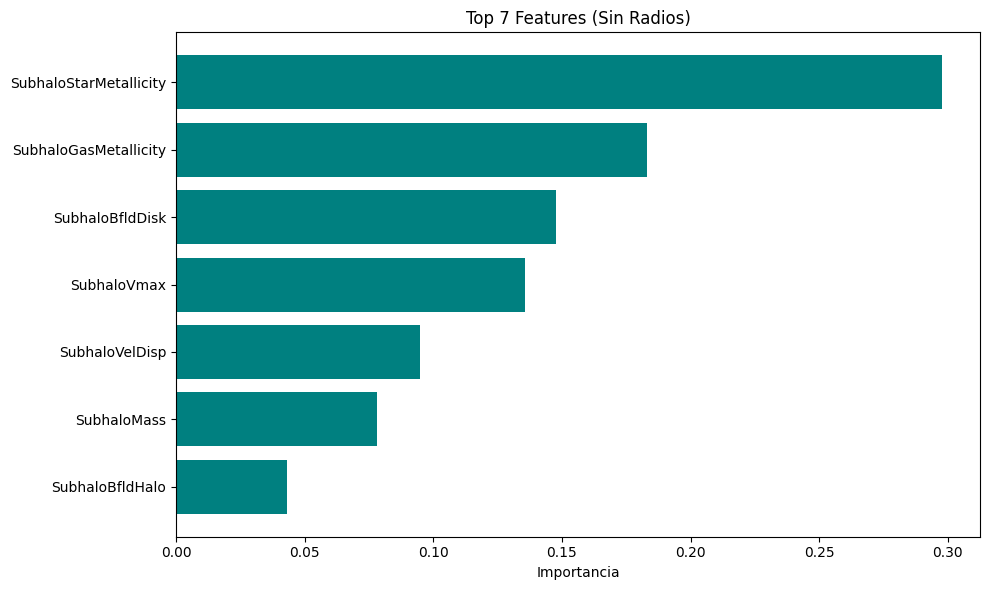

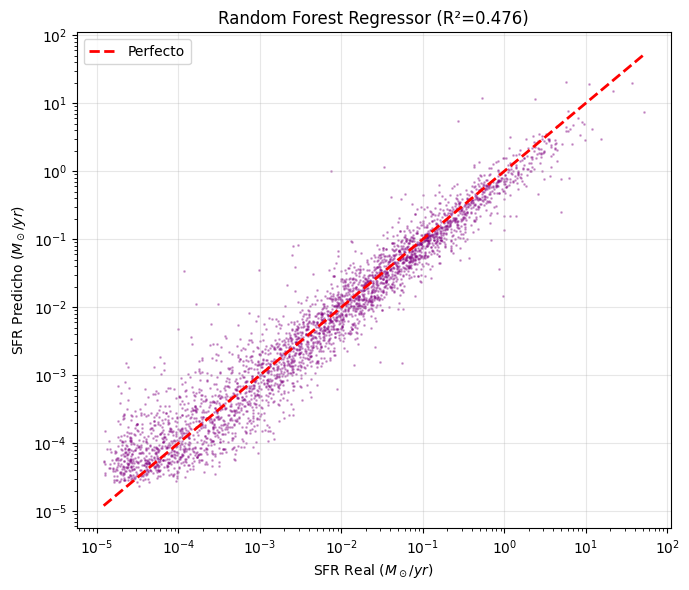


Generando gráficos de residuos...


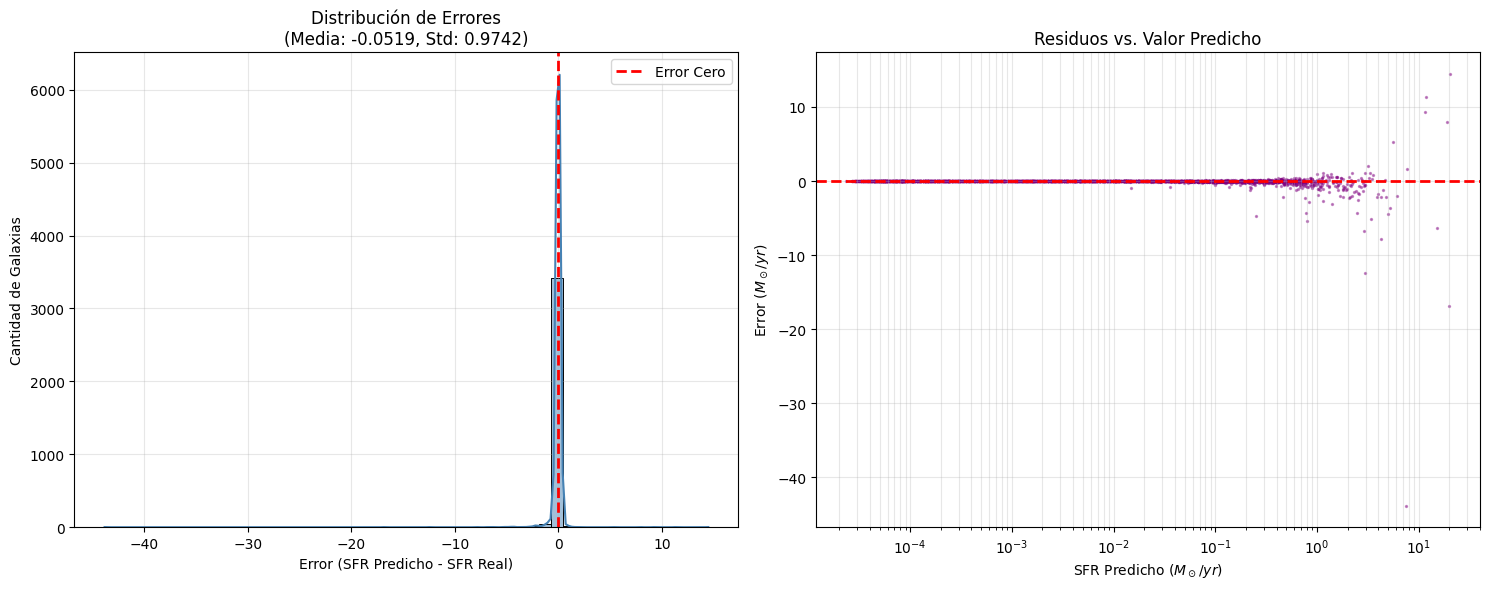

[CV] END max_depth=15, max_features=0.5, min_samples_leaf=1, n_estimators=200; total time=   7.8s
[CV] END max_depth=25, max_features=0.5, min_samples_leaf=1, n_estimators=200; total time=   7.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   6.0s
[CV] END max_depth=15, max_features=0.5, min_samples_leaf=1, n_estimators=200; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, n_estimators=100; total time=   2.8s
[CV] END max_depth=25, max_features=0.5, min_samples_leaf=4, n_estimators=100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   5.6s
[CV] END max_depth=15, max_features=0.5, min_samples_leaf=4, n_estimators=200; total time=   6.0s
[CV] END max_d

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    make_scorer,
    mean_absolute_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


print("="*60)
print("ANÁLISIS EXPLORATORIO - Distribución de SFR")
print("="*60)

df_reg = df.copy()

print(f"\nDataset original: {len(df_reg):,} galaxias")
print(f"Features totales: {len(df_reg.columns)}")

# Estadísticas de SFR ANTES de cualquier filtro
print("\n--- Estadísticas SFR ---")
print(df_reg['SubhaloSFR'].describe())

print("\n" + "="*60)
print("LIMPIEZA DE FEATURES (Leakage + Radios)")
print("="*60)

all_cols = df_reg.columns

rad_cols = [c for c in all_cols if 'rad' in c.lower()]


leakage_cols = [c for c in all_cols if 'sfr' in c.lower() and c != 'SubhaloSFR']


cols_to_drop = list(set(rad_cols + leakage_cols))
if 'JellyfishFlag' in df_reg.columns:
    cols_to_drop.append('JellyfishFlag')

print(f"\n  Eliminando {len(rad_cols)} columnas de Radios ('rad').")
print(f"  Eliminando {len(leakage_cols)} columnas de Leakage ('sfr').")
print(f"  Total columnas a eliminar: {len(cols_to_drop)}")

# Aplicar eliminación
df_reg = df_reg.drop(columns=cols_to_drop)

# Verificar columnas sospechosas restantes
suspicious_cols = [col for col in df_reg.columns if any(
    keyword in col.lower() 
    for keyword in ['star', 'stellar', 'formation']
) and col != "SubhaloSFR"]

if len(suspicious_cols) > 0:
    print(f"\n Advertencia: Columnas restantes potencialmente relacionadas:")
    for c in suspicious_cols:
        print(f"  - {c}")

print(f"\nShape final post-limpieza: {df_reg.shape}")


print("\n" + "="*60)
print("SAMPLING DEL DATASET")
print("="*60)

# Solo galaxias con SFR > 0 (más realista para regresión física)
df_active = df_reg[df_reg['SubhaloSFR'] > 0].copy()
print(f"\n→ Usando solo galaxias con SFR > 0: {len(df_active):,}")

# Sample de 500k (o menos si no hay suficientes) para que el GridSearch no tarde días
sample_size = min(500_000, len(df_active))
df_sample = df_active.sample(n=sample_size, random_state=42)

print(f"Dataset final para regresión: {len(df_sample):,}")
print(f"Features predictores: {df_sample.shape[1] - 1}")


X = df_sample.drop("SubhaloSFR", axis=1)
y = df_sample["SubhaloSFR"]

skewness = y.skew()
print(f"\nSkewness de SFR: {skewness:.2f}")

if skewness > 2:
    print(" SFR muy sesgado, aplicando transformación log10")
    use_log = True
    y = np.log10(y) # Como ya filtramos >0, no necesitamos +epsilon
else:
    use_log = False
    print("→ Usando SFR sin transformar")

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\nTrain: {len(X_train):,} muestras")
print(f"Test:  {len(X_test):,} muestras")

print("\n" + "="*60)
print("CONFIGURACIÓN GRID SEARCH")
print("="*60)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [15, 25, None],
    "min_samples_leaf": [1, 4],
    "max_features": ["sqrt", 0.5]
}

print(f"Combinaciones a probar: {np.prod([len(v) for v in param_grid.values()])}")

neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

rf = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,  # 3 folds es suficiente y más rápido
    scoring=neg_mse,
    verbose=2,
    n_jobs=-1
)

print("\n" + "="*60)
print("ENTRENAMIENTO (Esto puede tardar unos minutos...)")
print("="*60)

grid.fit(X_train, y_train)

print("\n" + "="*60)
print("RESULTADOS")
print("="*60)

print("MEJORES HIPERPARÁMETROS:")
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

# Revertir log para métricas reales
if use_log:
    y_test_eval = 10 ** y_test
    y_pred_test_eval = 10 ** y_pred_test
else:
    y_test_eval = y_test
    y_pred_test_eval = y_pred_test

r2 = r2_score(y_test_eval, y_pred_test_eval)
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_test_eval))

print(f"\n--- Evaluación Final (Escala Real) ---")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f} M_sun/yr")



# 9.1) Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_n = 7
plt.barh(range(top_n), importances.values[:top_n], color='teal')
plt.yticks(range(top_n), importances.index[:top_n])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title(f'Top {top_n} Features (Sin Radios)')
plt.tight_layout()
plt.show()

# 9.2) Real vs Predicho
plt.figure(figsize=(7, 6))
plt.scatter(y_test_eval, y_pred_test_eval, s=1, alpha=0.3, c='purple')
plt.plot([y_test_eval.min(), y_test_eval.max()], 
         [y_test_eval.min(), y_test_eval.max()], 
         "r--", lw=2, label='Perfecto')

plt.xlabel('SFR Real ($M_\odot/yr$)')
plt.ylabel('SFR Predicho ($M_\odot/yr$)')
plt.title(f'Random Forest Regressor (R²={r2:.3f})')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGenerando gráficos de residuos...")

residuals = y_pred_test_eval - y_test_eval

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- GRÁFICO A: Histograma de Errores ---
# Lo ideal es una campana de Gauss centrada en 0.
sns.histplot(residuals, kde=True, ax=axes[0], color="steelblue", bins=50)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Error Cero')
axes[0].set_title(f'Distribución de Errores\n(Media: {np.mean(residuals):.4f}, Std: {np.std(residuals):.4f})')
axes[0].set_xlabel('Error (SFR Predicho - SFR Real)')
axes[0].set_ylabel('Cantidad de Galaxias')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# --- GRÁFICO B: Residuos vs Predicción ---

axes[1].scatter(y_pred_test_eval, residuals, s=2, alpha=0.4, c='purple')
axes[1].axhline(0, color="red", linestyle="--", linewidth=2)
axes[1].set_title('Residuos vs. Valor Predicho')
axes[1].set_xlabel('SFR Predicho ($M_\odot/yr$)')
axes[1].set_ylabel('Error ($M_\odot/yr$)')

# Usamos escala logarítmica en X si los valores son muy grandes
# para ver mejor la distribución
axes[1].set_xscale('log') 
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

PREPARACIÓN DE DATOS


NameError: name 'df' is not defined